# **La Liga Data Analysis**
In this notebook a dataset belonging to FBRef is analyzed. The aim is to gain novel insights from LaLiga data with the end goal to have fun and further understand the bautiful game.

Data is scraped from FBREF with python libraries requests and Beautiful Soup in another developed script. Different metrics are analyzed here for both teams and players, and different types of visualizations are explored.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


Jornada = 26

In [2]:
df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Standard_stats_Jornada{Jornada}.csv')


In [3]:
# This dictionary points each team name (Team) to each corresponding crest image file (Crest). The crests are stored within a folder that will be point to later with that exact name
team_data = [
 {'Team': 'Alavés', 'Crest': 'Alaves.png', 'Color': '#0761AF'},
 {'Team': 'Almería', 'Crest': 'Almeria.png', 'Color': '#ee1119'},
 {'Team': 'Athletic Club', 'Crest': 'Athletic.png', 'Color': '#EE2523'},
 {'Team': 'Atlético Madrid', 'Crest': 'AtleticoMadrid.png', 'Color': '#CB3524'},
 {'Team': 'Barcelona', 'Crest': 'Barcelona.png', 'Color': '#A50044'},
 {'Team': 'Betis', 'Crest': 'Betis.png', 'Color': '#0BB363'},
 {'Team': 'Cádiz', 'Crest': 'Cadiz.png', 'Color': '#ffe500'},
 {'Team': 'Celta Vigo', 'Crest': 'Celta.png', 'Color': '#8AC3EE'},
 {'Team': 'Getafe', 'Crest': 'Getafe.png', 'Color': '#004fa3'},
 {'Team': 'Girona', 'Crest': 'Girona.png', 'Color': '#ff0000'},
 {'Team': 'Granada', 'Crest': 'Granada.png', 'Color': '#A61B2B'},
 {'Team': 'Las Palmas', 'Crest': 'LasPalmas.png', 'Color': '#c6da36'},
 {'Team': 'Mallorca', 'Crest': 'Mallorca.png', 'Color': '#E20613'},
 {'Team': 'Osasuna', 'Crest': 'Osasuna.png', 'Color': '#D91A21'},
 {'Team': 'Rayo Vallecano', 'Crest': 'RayoVallecano.png', 'Color': 'ff0000'},
 {'Team': 'Real Madrid', 'Crest': 'RealMadrid.png', 'Color': '#FFFFFF'},
 {'Team': 'Real Sociedad', 'Crest': 'RealSociedad.png', 'Color': '#0067B1'},
 {'Team': 'Sevilla', 'Crest': 'Sevilla.png', 'Color': '#F43333'},
 {'Team': 'Valencia', 'Crest': 'Valencia.png', 'Color': '#D18816'},
 {'Team': 'Villarreal', 'Crest': 'Villareal.png', 'Color': '#FFE667'}
]

## **EXPECTED GOALS (xG)**
This metric intends to describe the probability of a shot ending in goal. The objective is to show when a particular player is expected to score from a particular opportunity. It rates how good the goal-scoring situation has been.
It is calculated by training a model with thousands of shot situations that occured in the past in order to estimate how likely a goal is scored from 0 to 1. A 6 would be that on average out of 10 shots, 6 are scored from that particular position.

### The benefits of expected goals
- Highlight the **importance of shot quality** by emphasising the low chance to score from disadvantageous positions.
- Identify particulary good finishers.
- Analyzing team performance. Provides a metric to objectively state if a team is over-performing or under-performing in recent matches. If a team is out-performing their xG, they can generally be expected to experience a drop-off in results further down the line when they stop getting the rub of the green. They had been really good finishers or lucky in their recent games.

### Weaknesses of expected goals
- Using this metric in relation to a single game can be misleading and ultimately useless, as the sample size is too small.
- Often used as a descriptive statistic rather than a predictive one.
- There are limitations in terms of the data available. For example, the state of play, how many players are in front of the ball...

### **Expected Assists**
This metric makes reference to the xG that follows a pass that assists a shot.

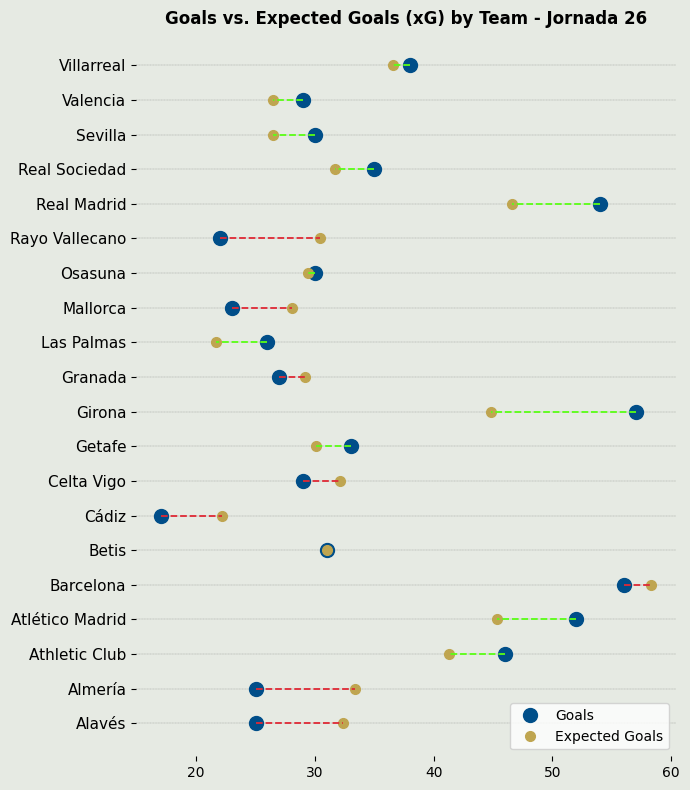

In [4]:
# Create a figure for the plot
fig, ax = plt.subplots(figsize=(7, 8))

goals_color="#004E89"
xg_color="#BFA550"

# Plot the points for goals and expected goals on the y-axis and connect them with lines on the x-axis
for i, row in df.iterrows():
    team = row['team']
    goals = row['goals']
    xg = row['xg']
    y = i  # Position on the y-axis

    # Determine the color of the line based on the condition
    line_color = '#5AFF15' if goals > xg else '#DF2935'  #88BF50 #5AFF15

    # Plot the points for goals and xG
    ax.plot(goals, y, 'o', color=goals_color, label='Goals' if i == 0 else "",markersize=10)
    ax.plot(xg, y, 'o', color=xg_color, label='Expected Goals' if i == 0 else "",markersize=7)

    # Connect the points with a line
    ax.plot([goals, xg], [y, y], color=line_color,linestyle='--',linewidth=1.3)

# Set custom y-axis labels with team names
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df['team'],fontsize=11)

ax.set_title(f'Goals vs. Expected Goals (xG) by Team - Jornada {Jornada}', fontweight='bold',color="black",loc='center')

# Improve aesthetics by adding a background color
ax.set_facecolor('#E6EAE3')
fig.patch.set_facecolor('#E6EAE3')

# Remove top and right spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.grid(axis='y',linestyle='dotted',color='black',linewidth=0.2)
ax.legend(loc='lower right')
# Show the plot
plt.tight_layout()
plt.show()


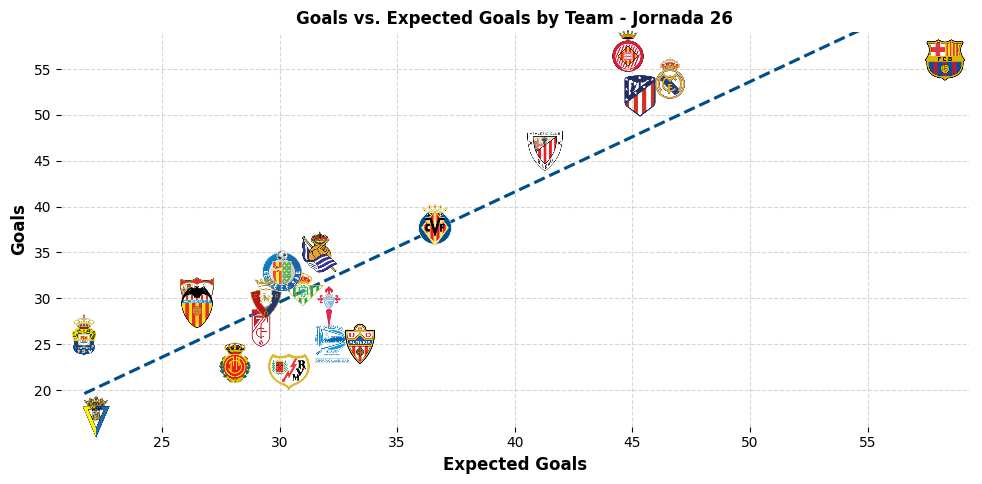

In [5]:
# Create a scatter plot with regression line using seaborn (with crest images as points)
plt.figure(figsize=(10, 5))
# Set custom x and y-axis limits to ensure all data points are visible
plt.xlim(min(df['xg']) - 1, max(df['xg']) + 1)
plt.ylim(min(df['goals']) - 1, max(df['goals']) + 2)

sns.set_context('notebook')

# Plot the regression line
sns.regplot(data=df, x='xg', y='goals', scatter=False, ci=None, color="#004E89", line_kws={'linestyle': '--'})

# Scatter plot with crest images as points
for i, row in df.iterrows():
    team_name = row['team']
    xg = row['xg']
    goals = row['goals']

    # Find the crest image filename for the team
    team_info = next((item for item in team_data if item['Team'] == team_name), None)
    if team_info:
        crest_filename = team_info['Crest']
    else:
        crest_filename = None

    # Load the crest image and resize it for the markers
    if crest_filename:
        crest_img = Image.open(os.path.join('/content/drive/MyDrive/FootballAnalytics/LaLiga/LaLiga_Crests_Background', crest_filename))
        #crest_img = crest_img.convert('RGB')  # Convert to RGB color mode
        crest_img = crest_img.resize((150, 150), Image.ADAPTIVE)

        # Create an OffsetImage for the crest
        imagebox = OffsetImage(crest_img, zoom=0.2)
        ab = AnnotationBbox(imagebox, (xg, goals), frameon=False)
        plt.gca().add_artist(ab)

# Customize the plot
plt.xlabel('Expected Goals',fontsize =12, fontweight= 'bold' )
plt.ylabel('Goals',fontsize = 12,fontweight='bold')
plt.title(f'Goals vs. Expected Goals by Team - Jornada {Jornada}',fontweight='bold',loc='center')


# Show the plot
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'Goals_vs_xG_regression_Jornada_{Jornada}.png')
plt.tight_layout()
plt.show()

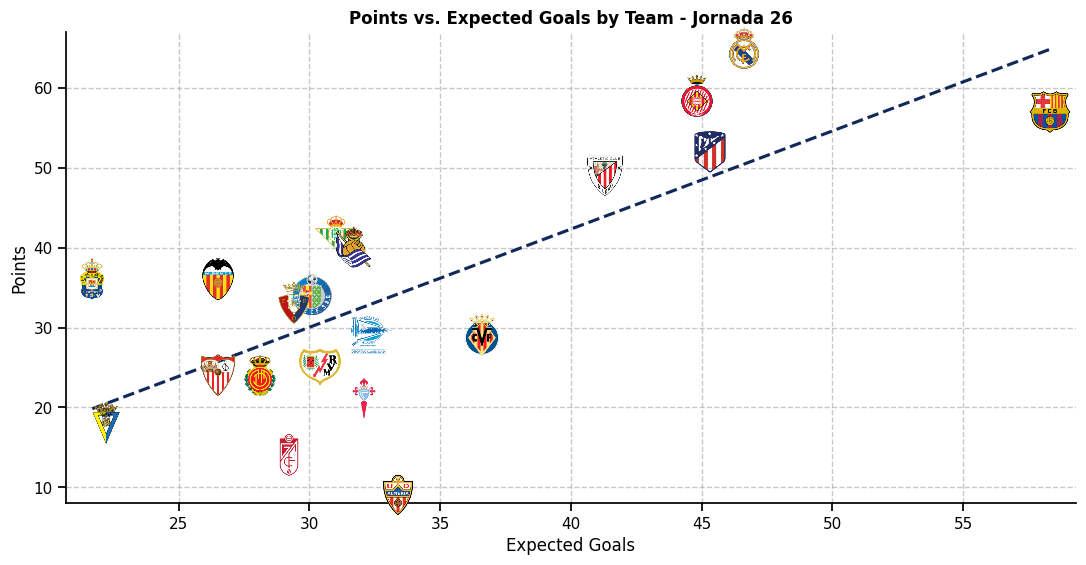

In [6]:
# Create a scatter plot with regression line using seaborn (with crest images as points)
plt.figure(figsize=(12, 6))
# Set custom x and y-axis limits to ensure all data points are visible
plt.xlim(min(df['xg']) - 1, max(df['xg']) + 1)
plt.ylim(min(df['points']) - 1, max(df['points']) + 2)

# Plot the regression line
sns.regplot(data=df, x='xg', y='points', scatter=False, ci=None, color="#112959", line_kws={'linestyle': '--'})

# Scatter plot with crest images as points
for i, row in df.iterrows():
    team_name = row['team']
    xg = row['xg']
    goals = row['points']

    # Find the crest image filename for the team
    team_info = next((item for item in team_data if item['Team'] == team_name), None)
    if team_info:
        crest_filename = team_info['Crest']
    else:
        crest_filename = None

    # Load the crest image and resize it for the markers
    if crest_filename:
        crest_img = Image.open(os.path.join('/content/drive/MyDrive/FootballAnalytics/LaLiga/LaLiga_Crests_Background', crest_filename))
        #crest_img = crest_img.convert('RGB')  # Convert to RGB color mode
        crest_img = crest_img.resize((150, 150), Image.ADAPTIVE)

        # Create an OffsetImage for the crest
        imagebox = OffsetImage(crest_img, zoom=0.2)
        ab = AnnotationBbox(imagebox, (xg, goals), frameon=False)
        plt.gca().add_artist(ab)

# Customize the plot
plt.xlabel('Expected Goals',fontsize =12 )
plt.ylabel('Points',fontsize = 12)
plt.title(f'Points vs. Expected Goals by Team - Jornada {Jornada}',fontweight='bold')

# Show the plot
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(f'Points_vs_xG_regression_Jornada_{Jornada}.png')
plt.show()

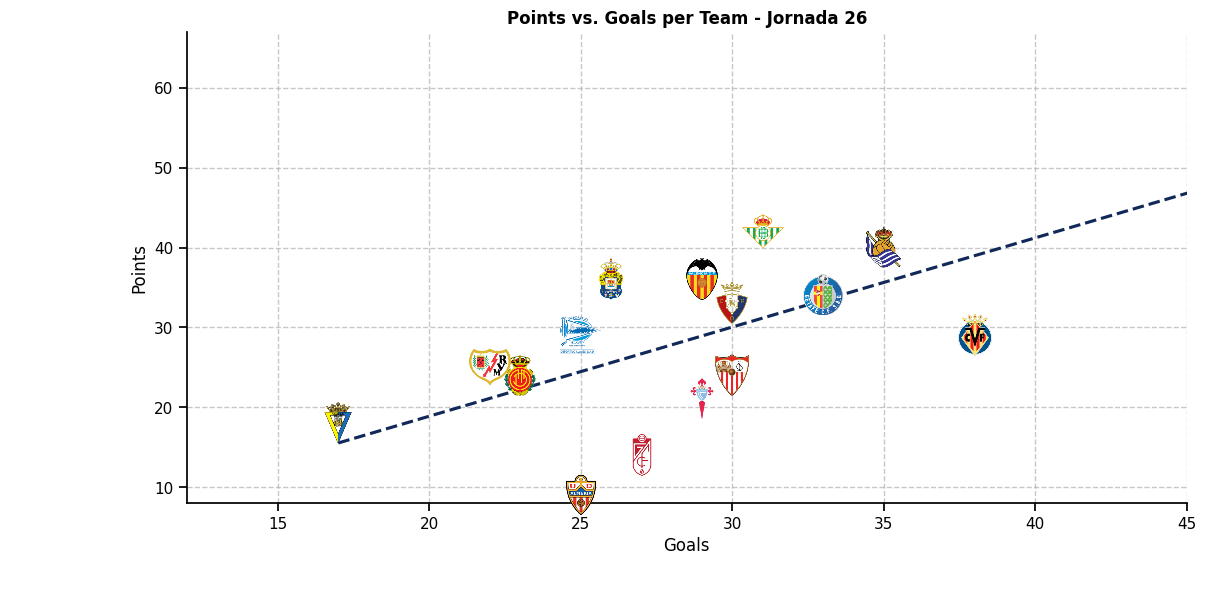

In [7]:
# Create a scatter plot with regression line using seaborn (with crest images as points)
plt.figure(figsize=(12, 6))
# Set custom x and y-axis limits to ensure all data points are visible
plt.xlim(min(df['xg']) - 1, max(df['xg']) + 1)
plt.ylim(min(df['points']) - 1, max(df['points']) + 2)

# Plot the regression line
sns.regplot(data=df, x='goals', y='points', scatter=False, ci=None, color="#112959", line_kws={'linestyle': '--'})

# Scatter plot with crest images as points
for i, row in df.iterrows():
    team_name = row['team']
    goals = row['goals']
    points = row['points']

    # Find the crest image filename for the team
    team_info = next((item for item in team_data if item['Team'] == team_name), None)
    if team_info:
        crest_filename = team_info['Crest']
    else:
        crest_filename = None

    # Load the crest image and resize it for the markers
    if crest_filename:
        crest_img = Image.open(os.path.join('/content/drive/MyDrive/FootballAnalytics/LaLiga/LaLiga_Crests_Background', crest_filename))
        #crest_img = crest_img.convert('RGB')  # Convert to RGB color mode
        crest_img = crest_img.resize((150, 150), Image.ADAPTIVE)

        # Create an OffsetImage for the crest
        imagebox = OffsetImage(crest_img, zoom=0.2)
        ab = AnnotationBbox(imagebox, (goals, points), frameon=False)
        plt.gca().add_artist(ab)

# Customize the plot
plt.xlabel('Goals',fontsize =12 )
plt.ylabel('Points',fontsize = 12)
plt.title(f'Points vs. Goals per Team - Jornada {Jornada}',fontweight='bold')
plt.xlim(12,45)
# Show the plot
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(f'Points_vs_xG_regression_Jornada_{Jornada}.png')
plt.show()

In [8]:
df_point=df[['team','points','goals']]
df_point['point_per_goal'] = df['points']/df['goals']
df_point.sort_values(by='point_per_goal',ascending=False)

<ipython-input-8-f83967b7b3d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_point['point_per_goal'] = df['points']/df['goals']


,team,points,goals,point_per_goal
11,Las Palmas,36,26,1.384615
5,Betis,42,31,1.354839
18,Valencia,36,29,1.241379
15,Real Madrid,65,54,1.203704
0,Alavés,29,25,1.160000
16,Real Sociedad,40,35,1.142857
14,Rayo Vallecano,25,22,1.136364
13,Osasuna,33,30,1.100000
2,Athletic Club,49,46,1.065217
6,Cádiz,18,17,1.058824


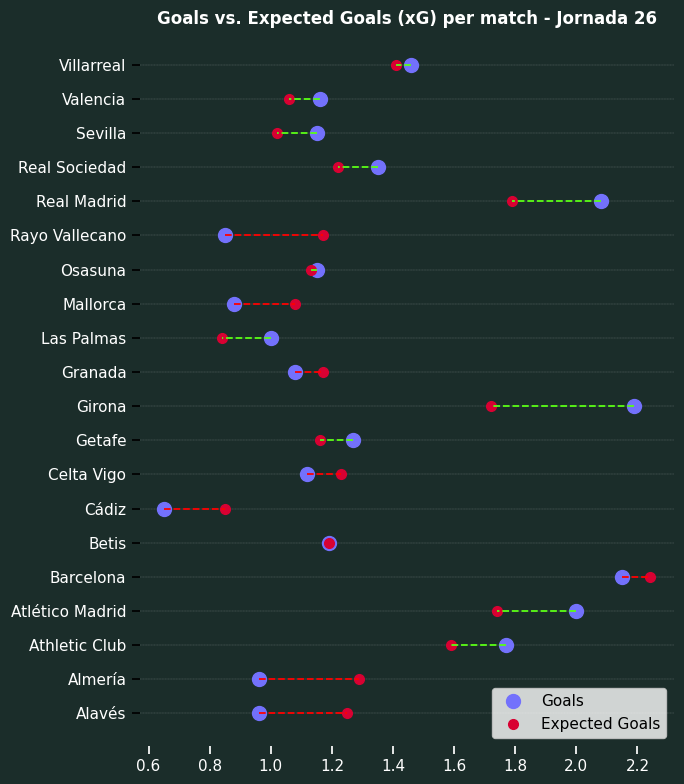

In [9]:
# Create a figure for the plot
fig, ax = plt.subplots(figsize=(7, 8))

goals_color="#7371FC"
xg_color="#D80132"

# Plot the points for goals and expected goals on the y-axis and connect them with lines on the x-axis
for i, row in df.iterrows():
    team = row['team']
    goals = row['goals_per90']
    xg = row['xg_per90']
    y = i  # Position on the y-axis

    # Determine the color of the line based on the condition
    line_color = '#5AFF15' if goals > xg else 'red'  #88BF50 #5AFF15

    # Plot the points for goals and xG
    ax.plot(goals, y, 'o', color=goals_color, label='Goals' if i == 0 else "",markersize=10)
    ax.plot(xg, y, 'o', color=xg_color, label='Expected Goals' if i == 0 else "",markersize=7)

    # Connect the points with a line
    ax.plot([goals, xg], [y, y], color=line_color,linestyle='--',linewidth=1.3)

# Set custom y-axis labels with team names
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df['team'],fontsize=11,color='white')

ax.set_title(f'Goals vs. Expected Goals (xG) per match - Jornada {Jornada}', fontweight='bold',color="white",loc='center')

ax.tick_params(axis='x', colors='white')
# Improve aesthetics by adding a background color
ax.set_facecolor('#1B2D2A')
fig.patch.set_facecolor('#1B2D2A')

# Remove top and right spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.grid(axis='y',linestyle='dotted',color='white',linewidth=0.2)
ax.legend(loc='lower right')
# Show the plot
plt.tight_layout()
plt.show()

## **Possession data per team**

<ipython-input-10-c522de495d1b>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet').reversed()


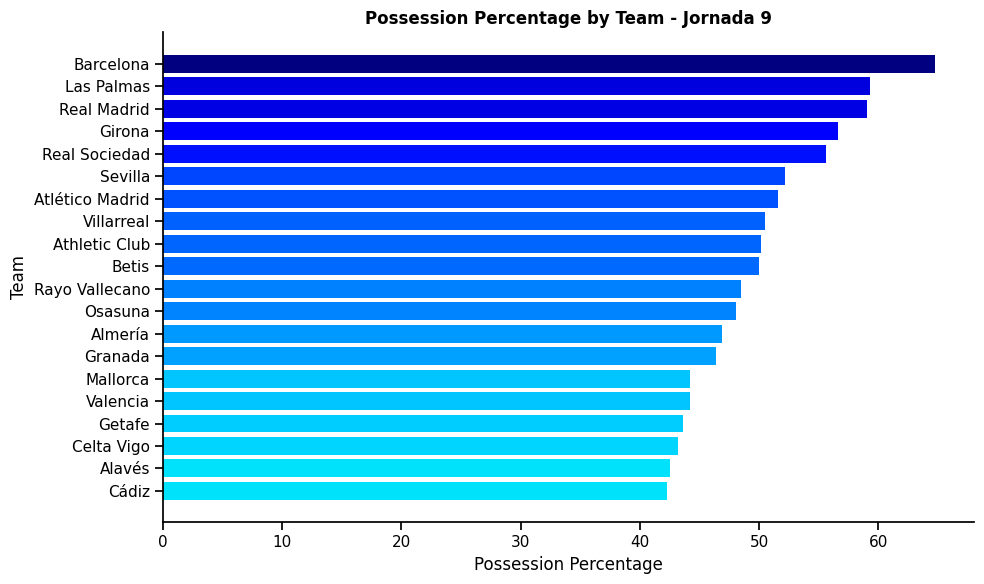

In [10]:
import matplotlib.cm as cm
# Sort the DataFrame by possession percentage in descending order
df = df.sort_values(by='possession', ascending=False)

# Create a colormap (e.g., using 'plasma' colormap)
cmap = cm.get_cmap('jet').reversed()

# Define the color for each bar based on possession percentage
colors = cmap(df['possession'] / df['possession'].max())

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.barh(df['team'], df['possession'], color=colors )
plt.xlabel('Possession Percentage',fontsize=12)
plt.ylabel('Team',fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Possession Percentage by Team - Jornada 9',fontweight='bold')
plt.tight_layout()

# Invert the y-axis
plt.gca().invert_yaxis()
plt.savefig(f'Possession per team_{Jornada}.png')
# Show the plot
plt.show()

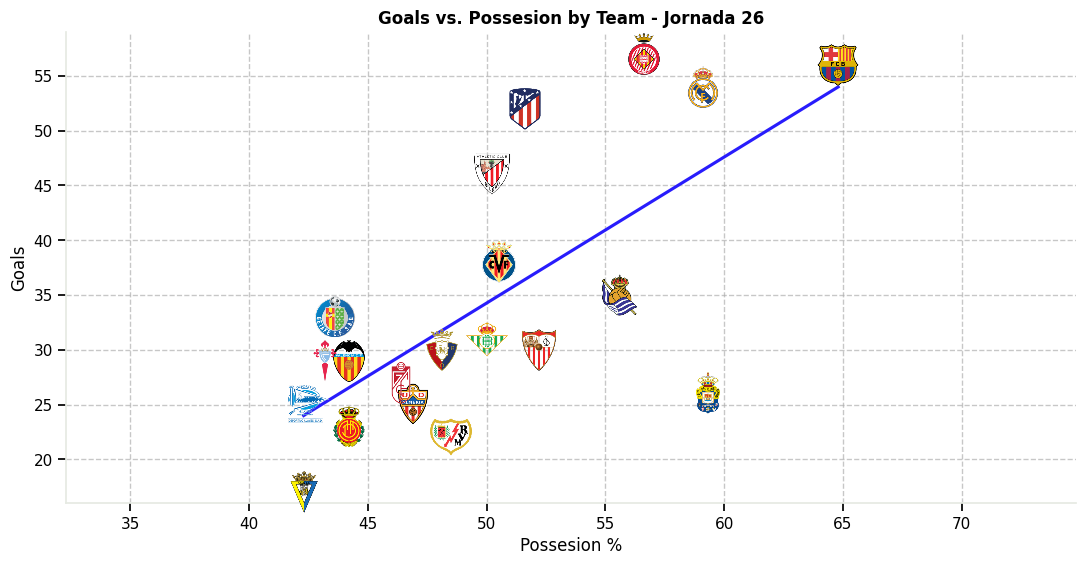

In [11]:

# Create a scatter plot with regression line using seaborn (with crest images as points)
plt.figure(figsize=(12, 6))
# Set custom x and y-axis limits to ensure all data points are visible
plt.xlim(min(df['possession']) - 10, max(df['possession']) +10)
plt.ylim(min(df['goals']) - 1, max(df['goals']) + 2)

# Plot the regression line
sns.regplot(data=df, x='possession', y='goals', scatter=False, ci=None,color="#281cfc")

# Scatter plot with crest images as points
for i, row in df.iterrows():
    team_name = row['team']
    poss = row['possession']
    goals = row['goals']

    # Find the crest image filename for the team
    team_info = next((item for item in team_data if item['Team'] == team_name), None)
    if team_info:
        crest_filename = team_info['Crest']
    else:
        crest_filename = None

    # Load the crest image and resize it for the markers
    if crest_filename:
        crest_img = Image.open(os.path.join('/content/drive/MyDrive/FootballAnalytics/LaLiga/LaLiga_Crests_Background', crest_filename))
        #crest_img = crest_img.convert('RGB')  # Convert to RGB color mode
        crest_img = crest_img.resize((150, 150), Image.ADAPTIVE)

        # Create an OffsetImage for the crest
        imagebox = OffsetImage(crest_img, zoom=0.2)
        ab = AnnotationBbox(imagebox, (poss, goals), frameon=False)
        plt.gca().add_artist(ab)

# Customize the plot
plt.xlabel('Possesion %',fontsize =12)
plt.ylabel('Goals', fontsize = 12)
plt.title(f'Goals vs. Possesion by Team - Jornada {Jornada}',fontweight='bold')

# Show the plot
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#E6EAE3')
plt.gca().spines['bottom'].set_color('#E6EAE3')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(f'Goals vs Possession_regression_Jornada_{Jornada}.png')
plt.show()

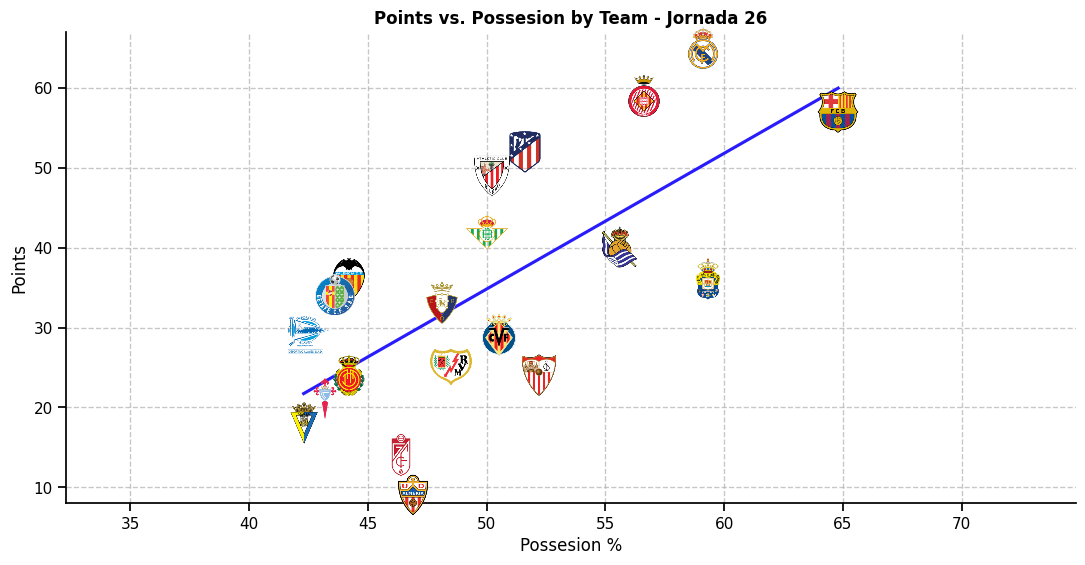

In [12]:

# Create a scatter plot with regression line using seaborn (with crest images as points)
plt.figure(figsize=(12, 6))
# Set custom x and y-axis limits to ensure all data points are visible
plt.xlim(min(df['possession']) - 10, max(df['possession']) +10)
plt.ylim(min(df['points']) - 1, max(df['points']) + 2)

# Plot the regression line
sns.regplot(data=df, x='possession', y='points', scatter=False, ci=None,color="#281cfc")

# Scatter plot with crest images as points
for i, row in df.iterrows():
    team_name = row['team']
    poss = row['possession']
    goals = row['points']

    # Find the crest image filename for the team
    team_info = next((item for item in team_data if item['Team'] == team_name), None)
    if team_info:
        crest_filename = team_info['Crest']
    else:
        crest_filename = None

    # Load the crest image and resize it for the markers
    if crest_filename:
        crest_img = Image.open(os.path.join('/content/drive/MyDrive/FootballAnalytics/LaLiga/LaLiga_Crests_Background', crest_filename))
        #crest_img = crest_img.convert('RGB')  # Convert to RGB color mode
        crest_img = crest_img.resize((150, 150), Image.ADAPTIVE)

        # Create an OffsetImage for the crest
        imagebox = OffsetImage(crest_img, zoom=0.2)
        ab = AnnotationBbox(imagebox, (poss, goals), frameon=False)
        plt.gca().add_artist(ab)

# Customize the plot
plt.xlabel('Possesion %',fontsize =12)
plt.ylabel('Points', fontsize = 12)
plt.title(f'Points vs. Possesion by Team - Jornada {Jornada}',fontweight='bold')

# Show the plot
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(f'Points_vs_posssesion_regression_Jornada_{Jornada}.png')
plt.show()

# **Player analysis**


In [14]:
stats=pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_Standard_Stats_Jornada{Jornada}.csv')
#stats=stats.dropna() # Importante borrar filas con Nan values ya que hay 36 en la extracción
#stats['age'] = stats['age'].astype(int)

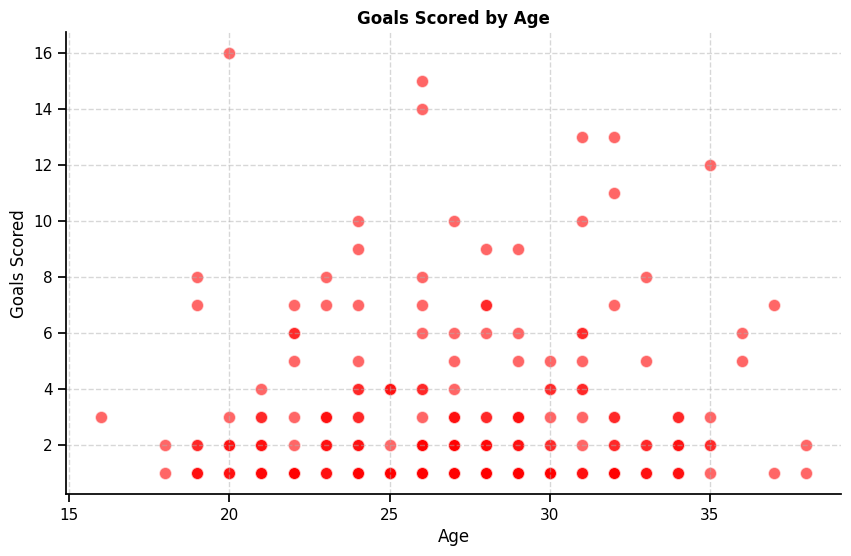

In [15]:
# Filter out entries where goals are not 0 and sort by age
stats_age = stats[stats['goals'] != 0]
stats_age = stats_age.sort_values(by='age')
stats_age.reset_index(drop=True, inplace=True)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(stats_age['age'], stats_age['goals'], alpha=0.6, edgecolors='w', s=80, color='red')

# Customize the plot
plt.xlabel('Age', fontsize=12)
plt.ylabel('Goals Scored', fontsize=12)
plt.title('Goals Scored by Age', fontweight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()




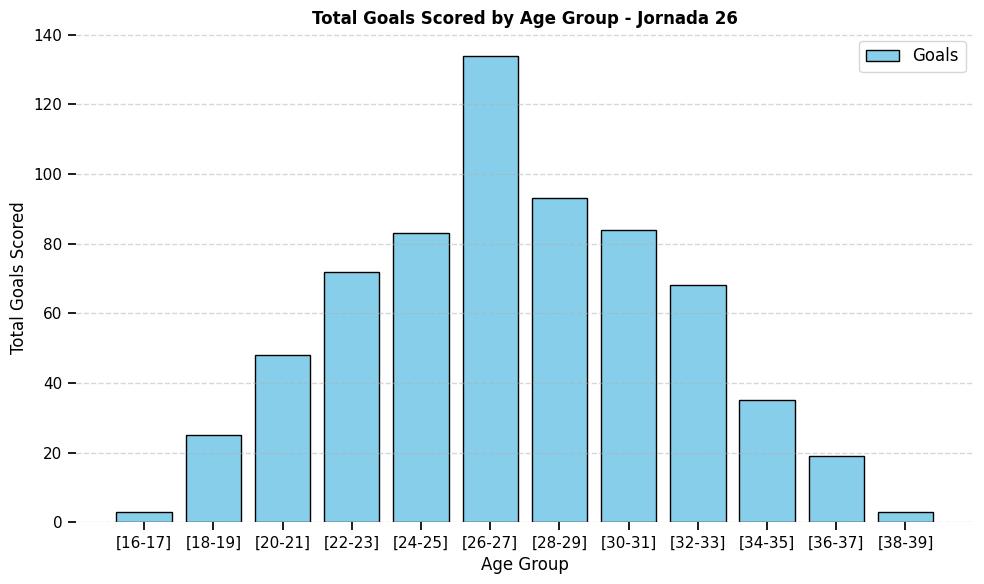

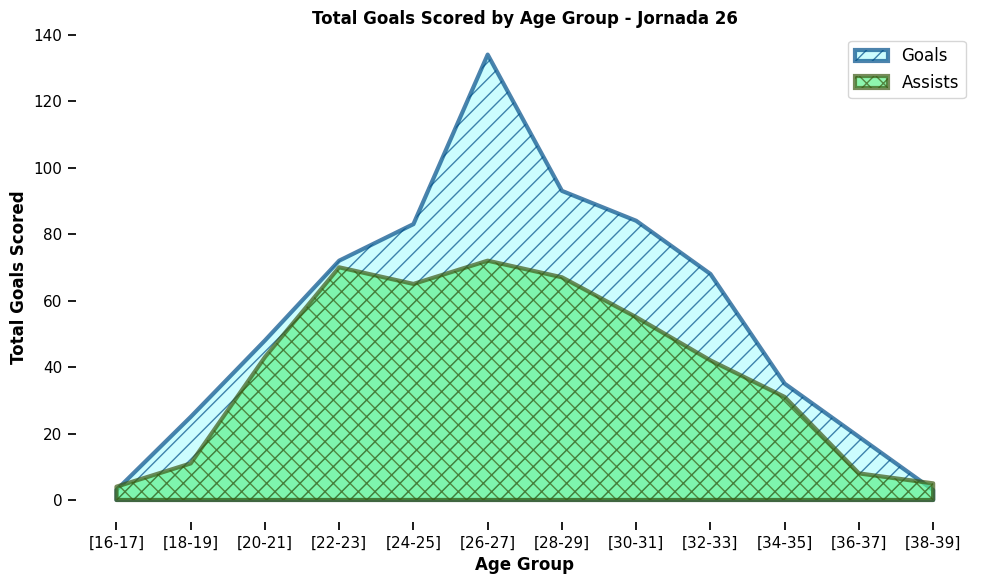

In [16]:
#Define age intervals and labels
age_intervals = range(stats['age'].min(), stats['age'].max()+2, 2)  # Starting from 15, with 2-year intervals up to max
age_labels = [f'[{start}-{start + 1}]' for start in age_intervals[:-1]]

# Create a new column 'Age Group' to categorize ages into intervals
stats_age_group = stats
stats_age_group['Age Group'] = pd.cut(stats_age_group['age'], bins=age_intervals, labels=age_labels, right=False)

# Group by 'Age Group' and sum the goals and assists in each group
grouped_data = stats.groupby('Age Group').agg({'goals': 'sum', 'assists': 'sum'}).reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Age Group'], grouped_data['goals'], edgecolor='black',color='skyblue',label="Goals")

# Customize the plot
plt.xlabel('Age Group',fontsize=12)
plt.ylabel('Total Goals Scored',fontsize = 12)
plt.title(f'Total Goals Scored by Age Group - Jornada {Jornada}',fontweight='bold')
plt.xticks(rotation=0, ha='center')  # Rotate and align labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='upper right',fontsize=12)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tight_layout()

# Show the plot
plt.show()

#-----------------------------------------------AREA CHART-------------------------------------

# Create a separate area chart
plt.figure(figsize=(10, 6))
# Define a custom color palette
custom_palette = sns.color_palette("pastel", 5)

# Use the custom palette for 'Goals' and 'Assists'
plt.fill_between(grouped_data['Age Group'], grouped_data['goals'], color="#B7FDFE", alpha=0.7, label='Goals', hatch='//',edgecolor='#004E89',linewidth=3)
plt.fill_between(grouped_data['Age Group'], grouped_data['assists'], color="#5EF38C", alpha=0.7, label='Assists', hatch='xx',edgecolor='#3C5A14',linewidth=3)

# Customize the area chart
plt.xlabel('Age Group',fontsize=12,fontweight='bold')
plt.ylabel('Total Goals Scored',fontsize=12,fontweight='bold')
plt.title(f'Total Goals Scored by Age Group - Jornada {Jornada}',fontweight='bold',loc='center')
plt.xticks(rotation=0, ha='center')  # Rotate and align labels for better readability
#plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.legend(loc='upper right', fontsize=12)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tight_layout()
# Show the area chart
plt.show()

In [17]:
print(grouped_data)

   Age Group  goals  assists
0    [16-17]      3        4
1    [18-19]     25       11
2    [20-21]     48       43
3    [22-23]     72       70
4    [24-25]     83       65
5    [26-27]    134       72
6    [28-29]     93       67
7    [30-31]     84       55
8    [32-33]     68       42
9    [34-35]     35       31
10   [36-37]     19        8
11   [38-39]      3        5


In [18]:
print(stats['assists'].sum())

473


In [19]:
a=stats_age_group.loc[stats_age_group['Age Group'] == "[22-23]"]

In [20]:
top = a.sort_values(by='assists',ascending=False)

In [21]:
top[['player','age','goals','assists','Age Group']]

,player,age,goals,assists,Age Group
45,Alex Baena,22,1,8,[22-23]
200,Mason Greenwood,22,5,5,[22-23]
468,Oihan Sancet,23,3,5,[22-23]
440,Rodrigo Riquelme,23,2,4,[22-23]
452,Rodrygo,23,8,4,[22-23]
...,...,...,...,...,...
3,Lucien Agoume,22,0,0,[22-23]
264,Juanmi Latasa,22,2,0,[22-23]
277,Enzo Loiodice,23,0,0,[22-23]
283,Dion Lopy,22,0,0,[22-23]


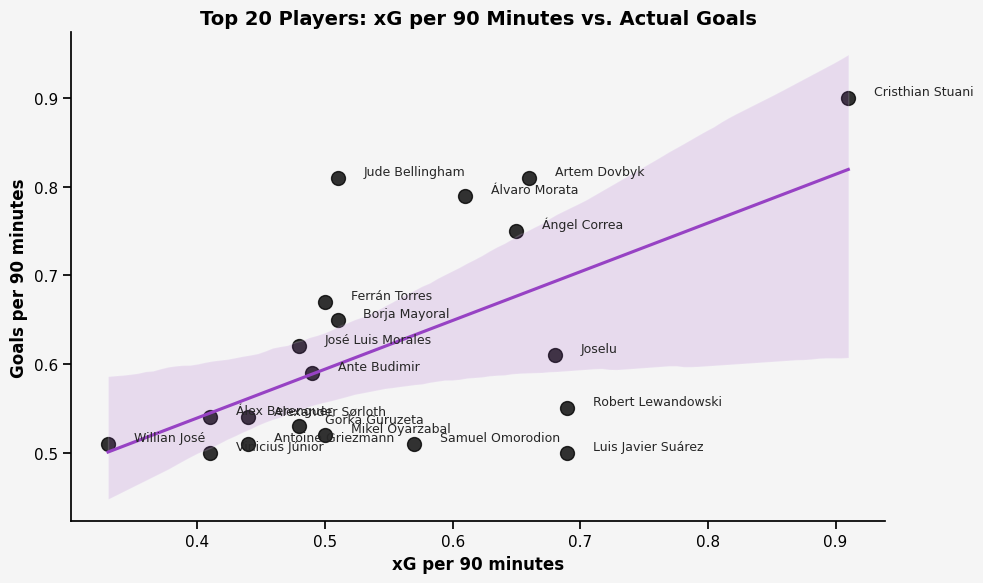

In [22]:
# Filter players with more than 5 full matches played (mins_90 > 5)
stats_filtered = stats[stats['minutes_90s'] > 7]

# Get the top twenty players with the most xG per 90 minutes
top_players = stats_filtered.nlargest(20, 'goals_per90')

# Create a regression plot
fig, ax = plt.subplots(figsize=(10, 6))


sns.regplot(x='xg_per90', y='goals_per90', data=top_players, scatter_kws={"s": 100}, color='black', line_kws={'color': '#9742C4'})
plt.xlabel('xG per 90 minutes', fontsize=12,fontweight='bold')
plt.ylabel('Goals per 90 minutes', fontsize=12,fontweight='bold')
plt.title('Top 20 Players: xG per 90 Minutes vs. Actual Goals', fontsize=14, fontweight='bold')
plt.grid(False)

# Improve the aesthetics
sns.set_style("whitegrid")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

fig.patch.set_facecolor('whitesmoke')  # This sets the color inside the axes
ax.set_facecolor('whitesmoke')
# Add player names to the plot
for i, player in top_players.iterrows():
    plt.text(player['xg_per90'] + 0.02, player['goals_per90'], player['player'], fontsize=9, ha='left', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
top_players[['player','goals','xg','minutes','assists','goals_per90','xg_per90']]

,player,goals,xg,minutes,assists,goals_per90,xg_per90
497,Cristhian Stuani,7,7.1,702,2,0.90,0.91
61,Jude Bellingham,16,10.1,1778,3,0.81,0.51
135,Artem Dovbyk,14,11.5,1565,5,0.81,0.66
349,Álvaro Morata,13,10.1,1490,1,0.79,0.61
108,Ángel Correa,7,6.1,840,2,0.75,0.65
515,Ferrán Torres,7,5.2,936,2,0.67,0.50
319,Borja Mayoral,15,11.8,2076,1,0.65,0.51
288,José Luis Morales,6,4.7,876,0,0.62,0.48
243,Joselu,8,8.9,1173,2,0.61,0.68
75,Ante Budimir,13,10.8,1971,2,0.59,0.49


## **Rankings in Python**
Rankings visualizations of different standard statistics like goals or assists.

### Top scorers / assisters/ xG / Goals + assists

In [24]:
# Sort the DataFrame by each metric in descending order
stats_goals = stats.sort_values(by='goals', ascending=False).head(20)
stats_assists = stats.sort_values(by='assists', ascending=False).head(20)
stats_xgoals = stats.sort_values(by='xg', ascending=False).head(20)
stats_goals_assists = stats.sort_values(by='goals_assists', ascending=False).head(20)

def format_name_age(row):
    return f'{row["player"]} ({row["age"]})'

# Apply the function to the DataFrame
stats_goals['player'] = stats_goals.apply(format_name_age, axis=1)
stats_assists['player'] = stats_assists.apply(format_name_age, axis=1)
stats_xgoals['player'] = stats_xgoals.apply(format_name_age, axis=1)
stats_goals_assists['player'] = stats_goals_assists.apply(format_name_age, axis=1)

# Plot 1: Goals
fig = plt.figure(figsize=(12, 8))
plt.barh(stats_goals['player'], stats_goals['goals'], color='skyblue')
plt.xlabel('Goals',fontsize=12)
plt.title('Top 20 Players by Goals',fontweight='bold')
plt.gca().invert_yaxis()  # Reverse the y-axis order
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)
# Save Plot 1 as 'top_20_players_by_goals.png'
plt.savefig('top_20_players_by_goals.png', bbox_inches='tight')

# Close the current figure
plt.close(fig)

# Plot 2: Assists
fig = plt.figure(figsize=(12, 8))
plt.barh(stats_assists['player'], stats_assists['assists'], color='lightgreen')
plt.xlabel('Assists',fontsize=12)
plt.title('Top 20 Players by Assists',fontweight='bold')
plt.gca().invert_yaxis()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)
# Save Plot 2 as 'top_20_players_by_assists.png'
plt.savefig('top_20_players_by_assists.png', bbox_inches='tight')

# Close the current figure
plt.close(fig)

# Plot 3: xGoals
fig = plt.figure(figsize=(12, 8))
plt.barh(stats_xgoals['player'], stats_xgoals['xg'], color='lightcoral')
plt.xlabel('xGoals',fontsize=12)
plt.title('Top 20 Players by xGoals',fontweight='bold')
plt.gca().invert_yaxis()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)
# Save Plot 3 as 'top_20_players_by_xGoals.png'
plt.savefig('top_20_players_by_xGoals.png', bbox_inches='tight')

# Close the current figure
plt.close(fig)

# Plot 4: xGoals_90min
fig = plt.figure(figsize=(12, 8))
plt.barh(stats_goals_assists['player'], stats_goals_assists['goals_assists'], color='lightblue')
plt.xlabel('Goals_90min',fontsize=12)
plt.title('Top 20 Players with highest total incidence Goals+Assists',fontweight='bold')
plt.gca().invert_yaxis()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)
# Save Plot 4 as 'top_20_players_by_goals_assists.png'
plt.savefig('top_20_players_by_goals_assists.png', bbox_inches='tight')

# Close the current figure
plt.close(fig)

 ### Players with most minutes played
Excluding goalkeepers

In [25]:
# Players with the most minutes played
#stats['minutes'] = stats['minutes'].str.replace(",","")
#stats['minutes'] = pd.to_numeric(stats['minutes'], errors='coerce')
most_min = stats[stats["position"] != "GK"]
most_min= most_min.sort_values(by='minutes',ascending=False).head(50).reset_index()
#print(most_min['minutes'])
most_min= most_min.loc[:, ['player', 'minutes', 'team']]
most_min.head(10)
#for index,row in most_min.iterrows():
  #print(f'{index}:{row["player"]}     {row["minutes"]}   {row["team"]}')

,player,minutes,team
0,Florian Lejeune,2337,Rayo Vallecano
1,Unai Núñez,2294,Celta Vigo
2,Aleix García,2228,Girona
3,José Luis García Vayá,2222,Valencia
4,Miguel Gutiérrez,2221,Girona
5,Nemanja Maksimović,2204,Getafe
6,Ander Guevara,2199,Alavés
7,Germán Pezzella,2166,Betis
8,David García,2160,Osasuna
9,Martín Zubimendi,2148,Real Sociedad


### Power couples per team

In [26]:
df_pc=pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_Standard_Stats_Jornada{Jornada}.csv')

# Create a new DataFrame to store the top 2 players for each team
df_top_players = pd.DataFrame(columns=['team', 'player','goals_assists'])

# Group the original DataFrame by 'team' and iterate through each group
for team, group in df_pc.groupby('team'):
    # Sort the group by the sum of 'G' and 'A' in descending order and get the top 2 players
    top_players =  group.nlargest(2, 'goals_assists')
    player = top_players['player'].iloc[0]
    player2 = top_players['player'].iloc[1]
    player = f"{player} & {player2}"
    total_goals_assists = top_players['goals_assists'].sum()

    # Append the data to the df_top_players DataFrame
    df_top_players = pd.concat([df_top_players, pd.DataFrame({'team': [team], 'player': [player], 'goals_assists': [total_goals_assists]})], ignore_index=True)

df_top_players = df_top_players.sort_values(by='goals_assists',ascending=False)
df_top_players.reset_index(drop=True, inplace=True)

In [27]:
df_top_players

,team,player,goals_assists
0,Girona,Artem Dovbyk & Sávio,33
1,Atlético Madrid,Antoine Griezmann & Álvaro Morata,31
2,Real Madrid,Jude Bellingham & Rodrygo,31
3,Barcelona,Robert Lewandowski & İlkay Gündoğan,28
4,Getafe,Borja Mayoral & Mason Greenwood,26
5,Villarreal,Alexander Sørloth & Gerard Moreno,25
6,Athletic Club,Gorka Guruzeta & Iñaki Williams,25
7,Celta Vigo,Jørgen Strand Larsen & Iago Aspas,21
8,Valencia,Hugo Duro & Diego López,20
9,Osasuna,Ante Budimir & Ezequiel Ávila,19


### Goalscorers xG


In [28]:
stats=pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_Standard_Stats_Jornada{Jornada}.csv')

In [29]:
goalscorers_df = stats.sort_values(by='goals',ascending=False).reset_index()

In [30]:
goalscorers_df = goalscorers_df[['player','goals','xg']]
goalscorers_df['goals/xg_dif']=goalscorers_df['goals']-goalscorers_df['xg']
goalscorers_df.head(20)

,player,goals,xg,goals/xg_dif
0,Jude Bellingham,16,10.1,5.9
1,Borja Mayoral,15,11.8,3.2
2,Artem Dovbyk,14,11.5,2.5
3,Ante Budimir,13,10.8,2.2
4,Álvaro Morata,13,10.1,2.9
5,Robert Lewandowski,12,15.0,-3.0
6,Antoine Griezmann,11,9.6,1.4
7,Gerard Moreno,10,7.9,2.1
8,Gorka Guruzeta,10,9.1,0.9
9,Hugo Duro,10,8.7,1.3


In [31]:
goalscorers_df.sort_values(by='goals/xg_dif',ascending=True)

,player,goals,xg,goals/xg_dif
88,Cyle Larin,2,6.9,-4.9
168,Alex Baena,1,4.4,-3.4
5,Robert Lewandowski,12,15.0,-3.0
559,Ianis Hagi,0,2.6,-2.6
76,Kiké,3,5.6,-2.6
...,...,...,...,...
17,Sávio,7,3.7,3.3
25,Takefusa Kubo,7,3.4,3.6
28,Marcos Llorente,6,2.4,3.6
33,Kirian Rodríguez,6,1.3,4.7


<ipython-input-32-34cdd3ac6de8>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df['player'], fontsize=12)
<ipython-input-32-34cdd3ac6de8>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontsize=12, fontweight='bold')


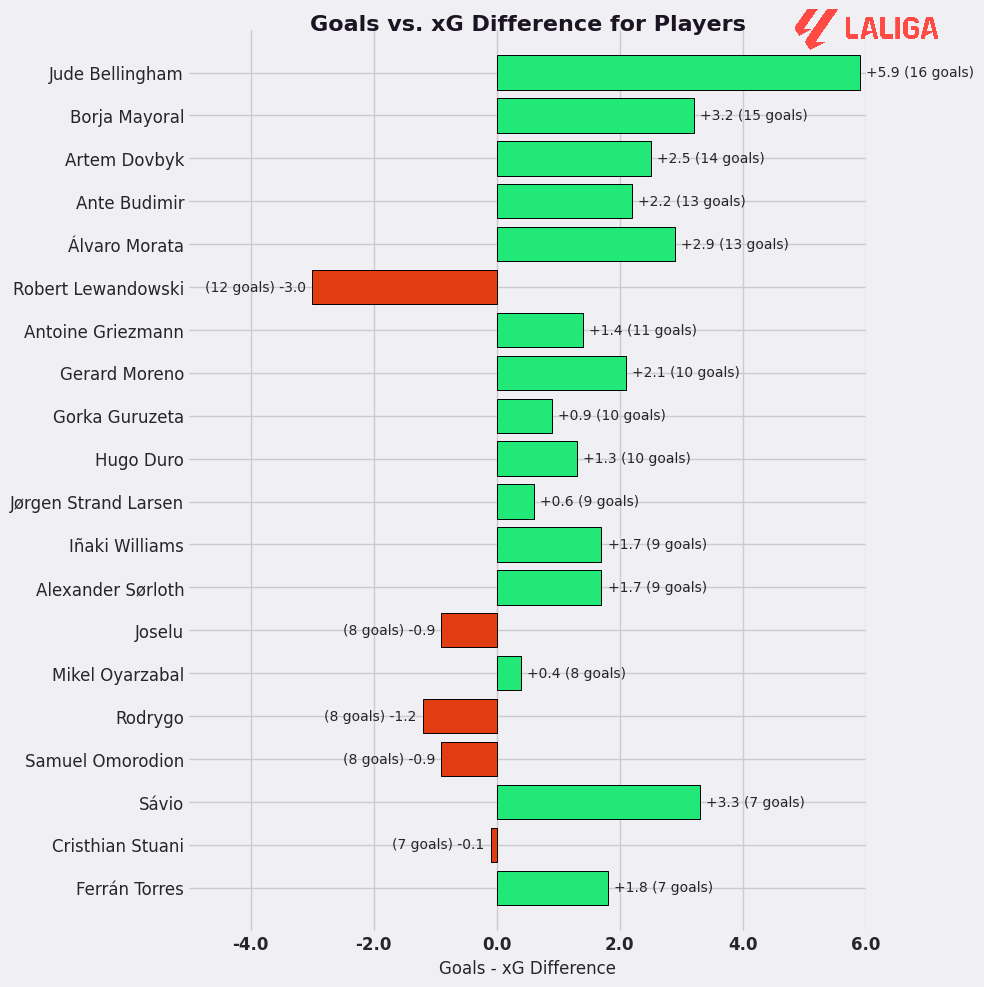

In [32]:
df = goalscorers_df.head(20)
df = df.iloc[::-1]
colors = ['#21E877' if dif >= 0 else '#E23C12' for dif in df['goals/xg_dif']]



fig, ax = plt.subplots(figsize=(10, 10))
bars = ax.barh(df['player'], df['goals/xg_dif'], color=colors,edgecolor='black',linewidth=0.7)

fig.set_facecolor('#F0EFF4')
ax.set_facecolor('#F0EFF4')

ax.set_xlabel('Goals - xG Difference',fontsize=12)
ax.set_title('Goals vs. xG Difference for Players',fontweight='bold',fontsize=16,color="#1A1423",y=0.99)

plt.ylim(-1, len(df['player']))
plt.xlim(-5, 6)
for i, bar in enumerate(bars):
    xval = bar.get_width()
    if xval >= 0:
        plt.text(xval+0.1, bar.get_y() + bar.get_height()/2, f"+{round(xval, 2)} ({df['goals'].iloc[i]} goals)", ha='left', va='center',fontsize=10)
    else:
        plt.text(xval-0.1, bar.get_y() + bar.get_height()/2, f"({df['goals'].iloc[i]} goals) {round(xval, 2)}", ha='right', va='center',fontsize=10)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

ax.set_yticklabels(df['player'], fontsize=12)
ax.set_xticklabels(ax.get_xticks(), fontsize=12, fontweight='bold')

ax.tick_params(axis='both', which='both', length=0)
plt.tight_layout()

img_path = '/content/drive/MyDrive/FootballAnalytics/LaLiga/laligalogo2.png'
img = plt.imread(img_path)
imagebox = OffsetImage(img, zoom=0.04)
ab = AnnotationBbox(imagebox, (1, 1), frameon=False, xycoords='axes fraction', boxcoords="axes fraction", pad=0)
ax.add_artist(ab)

plt.show()

## Progressive Passes vs Progressive Carries

In [33]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

passing_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_passing_Stats_Jornada{Jornada}.csv')
passing_df['progressive_passes_per90']=passing_df['progressive_passes']/passing_df['minutes_90s']
possession_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_possession_Stats_Jornada{Jornada}.csv')
possession_df['progressive_carries_per90']=possession_df['progressive_carries']/possession_df['minutes_90s']
merged_df = pd.merge(passing_df,possession_df,on='player',how='outer')


<ipython-input-34-162cd6be0ed2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df['total_progressive_actions'] = mod_df['progressive_passes'] + mod_df['progressive_carries']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-34-162cd6be0ed2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['cluster']

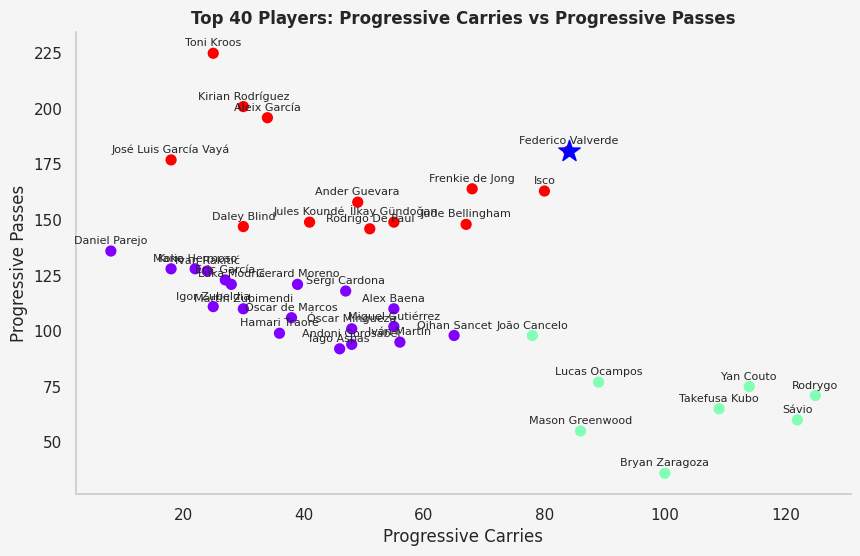

In [34]:
select_columns = ['player','position_x','minutes_90s_x','progressive_carries','progressive_passes']
mod_df = merged_df[select_columns]

#mod_df = mod_df[mod_df['position_x'].str.contains('MF',case=False, na=False)].reset_index(drop=True)
#mod_df = mod_df[mod_df['position_x']=='MF']

mod_df['total_progressive_actions'] = mod_df['progressive_passes'] + mod_df['progressive_carries']

sorted_df = mod_df.sort_values(by='total_progressive_actions', ascending=False)

top_20 = sorted_df.head(40)

cluster_columns = ['progressive_carries', 'progressive_passes']
cluster_data = top_20[cluster_columns]

scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
top_20['cluster'] = kmeans.fit_predict(cluster_data_scaled)

pca = PCA(n_components=2)
cluster_centers = pca.fit_transform(kmeans.cluster_centers_)
cluster_points = pca.transform(cluster_data_scaled)

fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(top_20['progressive_carries'], top_20['progressive_passes'], c=top_20['cluster'],cmap='rainbow',s=50)

plt.title('Top 40 Players: Progressive Carries vs Progressive Passes',fontweight='bold')
plt.xlabel('Progressive Carries',fontsize=12)
plt.ylabel('Progressive Passes',fontsize=12)

for i, row in top_20.iterrows():
    plt.annotate(row['player'], (row['progressive_carries'], row['progressive_passes']),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

max_actions_row = top_20.iloc[0]
plt.scatter(max_actions_row['progressive_carries'], max_actions_row['progressive_passes'], marker='*', color='blue', s=260, label='Max Actions')

sns.set_style("whitegrid")
sns.set_theme(style="white", rc={"axes.edgecolor": "grey", "xtick.color": "black", "ytick.color": "black"})

sns.despine()
fig.patch.set_facecolor('#F5F5F5')  # This sets the color inside the axes
ax.set_facecolor('#F5F5F5')
plt.grid(False)



In [35]:
top_20

,player,position_x,minutes_90s_x,progressive_carries,progressive_passes,total_progressive_actions,cluster
512,Federico Valverde,MF,23.5,84.0,181.0,265.0,2
251,Toni Kroos,MF,18.3,25.0,225.0,250.0,2
229,Isco,MF,20.5,80.0,163.0,243.0,2
233,Frenkie de Jong,MF,17.4,68.0,164.0,232.0,2
437,Kirian Rodríguez,MF,23.7,30.0,201.0,231.0,2
171,Aleix García,MF,24.8,34.0,196.0,230.0,2
61,Jude Bellingham,"MF,FW",19.8,67.0,148.0,215.0,2
204,Ander Guevara,MF,24.4,49.0,158.0,207.0,2
208,İlkay Gündoğan,MF,23.3,55.0,149.0,204.0,2
118,Rodrigo De Paul,MF,15.7,51.0,146.0,197.0,2


<ipython-input-36-e4aad1992c04>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df['total_progressive_actions'] = mod_df['progressive_passes_per90'] + mod_df['progressive_carries_per90']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-36-e4aad1992c04>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_2

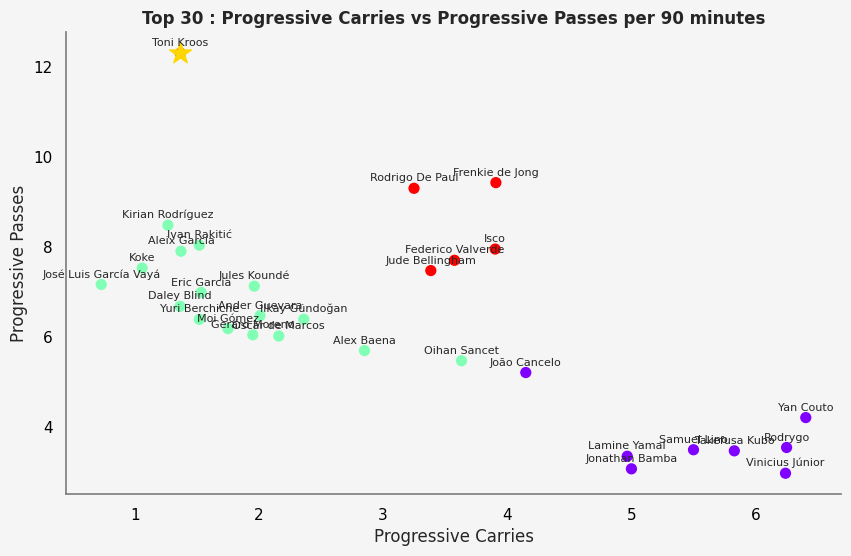

In [36]:
select_columns = ['player','position_x','progressive_carries_per90','progressive_passes_per90']
merged_df = merged_df[merged_df['minutes_90s_x']>Jornada/2]
mod_df = merged_df[select_columns]

#od_df = mod_df[mod_df['position_x'].str.contains('MF',case=False, na=False)].reset_index(drop=True)
#mod_df = mod_df[mod_df['position_x']=='MF']

mod_df['total_progressive_actions'] = mod_df['progressive_passes_per90'] + mod_df['progressive_carries_per90']

sorted_df = mod_df.sort_values(by='total_progressive_actions', ascending=False)

top_20 = sorted_df.head(30)

cluster_columns = ['progressive_carries_per90', 'progressive_passes_per90']
cluster_data = top_20[cluster_columns]

scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
top_20['cluster'] = kmeans.fit_predict(cluster_data_scaled)

pca = PCA(n_components=2)
cluster_centers = pca.fit_transform(kmeans.cluster_centers_)
cluster_points = pca.transform(cluster_data_scaled)

fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(top_20['progressive_carries_per90'], top_20['progressive_passes_per90'], c=top_20['cluster'],cmap='rainbow',s=50)

plt.title('Top 30 : Progressive Carries vs Progressive Passes per 90 minutes',fontweight='bold')
plt.xlabel('Progressive Carries',fontsize=12)
plt.ylabel('Progressive Passes',fontsize=12)

for i, row in top_20.iterrows():
    plt.annotate(row['player'], (row['progressive_carries_per90'], row['progressive_passes_per90']),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

max_actions_row = top_20.iloc[0]
plt.scatter(max_actions_row['progressive_carries_per90'], max_actions_row['progressive_passes_per90'], marker='*',
            color='gold', s=270, label='Max Actions')

sns.set_style("whitegrid")
sns.set_theme(style="white", rc={"axes.edgecolor": "grey", "xtick.color": "black", "ytick.color": "black"})

sns.despine()
fig.patch.set_facecolor('#F5F5F5')  # This sets the color inside the axes
ax.set_facecolor('#F5F5F5')
plt.grid(False)


In [37]:
top_20

,player,position_x,progressive_carries_per90,progressive_passes_per90,total_progressive_actions,cluster
251,Toni Kroos,MF,1.366120,12.295082,13.661202,2
233,Frenkie de Jong,MF,3.908046,9.425287,13.333333,2
118,Rodrigo De Paul,MF,3.248408,9.299363,12.547771,2
229,Isco,MF,3.902439,7.951220,11.853659,2
512,Federico Valverde,MF,3.574468,7.702128,11.276596,2
61,Jude Bellingham,"MF,FW",3.383838,7.474747,10.858586,2
110,Yan Couto,"DF,MF",6.404494,4.213483,10.617978,0
439,Rodrygo,FW,6.250000,3.550000,9.800000,0
437,Kirian Rodríguez,MF,1.265823,8.481013,9.746835,1
413,Ivan Rakitić,MF,1.518987,8.037975,9.556962,1


## Progressive carries info

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-38-dd6e4f58ab25>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['cluster'] = kmeans.fit_predict(cluster_data_scaled)


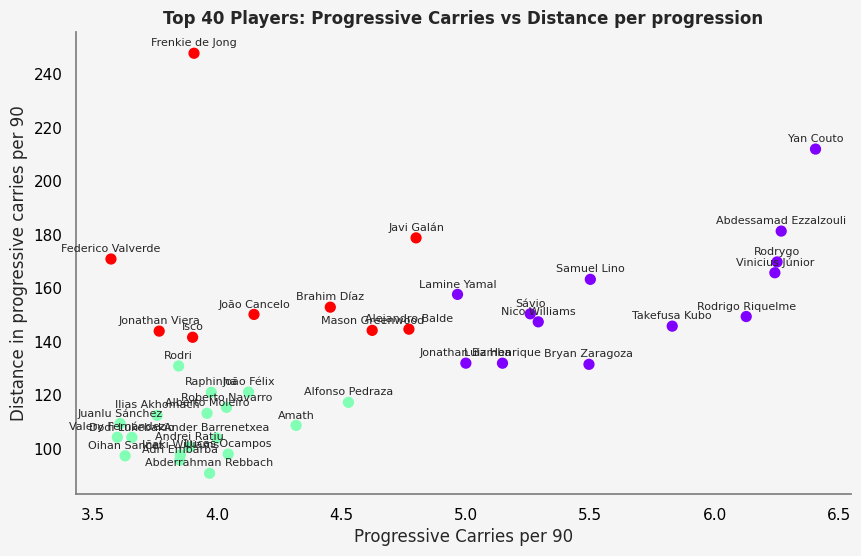

In [38]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

possession_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_possession_Stats_Jornada{Jornada}.csv')
possession_df['progressive_carries_per90']=possession_df['progressive_carries']/possession_df['minutes_90s']
possession_df['carries_progressive_distance_per90'] = possession_df['carries_progressive_distance']/possession_df['minutes_90s']
possession_df = possession_df[possession_df['minutes_90s']>3.5]
select_columns = ['player','position','minutes_90s','progressive_carries_per90','carries_progressive_distance_per90']
mod_df = possession_df[select_columns]

#mod_df = mod_df[mod_df['position_x'].str.contains('MF',case=False, na=False)].reset_index(drop=True)
#mod_df = mod_df[mod_df['position_x']=='MF']

sorted_df = mod_df.sort_values(by='progressive_carries_per90', ascending=False)

top_20 = sorted_df.head(40)
cluster_columns = ['progressive_carries_per90', 'carries_progressive_distance_per90']
cluster_data = top_20[cluster_columns]

scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
top_20['cluster'] = kmeans.fit_predict(cluster_data_scaled)

pca = PCA(n_components=2)
cluster_centers = pca.fit_transform(kmeans.cluster_centers_)
cluster_points = pca.transform(cluster_data_scaled)

fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(top_20['progressive_carries_per90'], top_20['carries_progressive_distance_per90'], c=top_20['cluster'],cmap='rainbow',s=50)

plt.title('Top 40 Players: Progressive Carries vs Distance per progression',fontweight='bold')
plt.xlabel('Progressive Carries per 90',fontsize=12)
plt.ylabel('Distance in progressive carries per 90',fontsize=12)

for i, row in top_20.iterrows():
    plt.annotate(row['player'], (row['progressive_carries_per90'], row['carries_progressive_distance_per90']),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

#max_actions_row = top_20.iloc[0]
#plt.scatter(max_actions_row['progressive_carries'], max_actions_row['progressive_passes'], marker='*', color='blue', s=260, label='Max Actions')

sns.set_style("whitegrid")
sns.set_theme(style="white", rc={"axes.edgecolor": "grey", "xtick.color": "black", "ytick.color": "black"})

sns.despine()
fig.patch.set_facecolor('#F5F5F5')  # This sets the color inside the axes
ax.set_facecolor('#F5F5F5')
plt.grid(False)



In [39]:
top_20

,player,position,minutes_90s,progressive_carries_per90,carries_progressive_distance_per90,cluster
96,Yan Couto,"DF,MF",17.8,6.404494,212.022472,0
126,Abdessamad Ezzalzouli,FW,7.5,6.266667,181.333333,0
384,Rodrygo,FW,20.0,6.250000,169.800000,0
208,Vinicius Júnior,FW,14.1,6.241135,165.744681,0
374,Rodrigo Riquelme,"DF,MF",11.1,6.126126,149.369369,0
219,Takefusa Kubo,"FW,MF",18.7,5.828877,145.775401,0
234,Samuel Lino,DF,14.0,5.500000,163.285714,0
474,Bryan Zaragoza,"MF,FW",18.2,5.494505,131.483516,0
467,Nico Williams,FW,17.2,5.290698,147.383721,0
405,Sávio,"MF,FW",23.2,5.258621,150.387931,0


## Passing creativity

In [40]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

passing_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_passing_Stats_Jornada{Jornada}.csv')
passing_df['assisted_shots_per90']=passing_df['assisted_shots']/passing_df['minutes_90s']
passing_df['pass_xa_per90']=passing_df['pass_xa']/passing_df['minutes_90s']
passing_df['xg_assist_per90']=passing_df['xg_assist']/passing_df['minutes_90s']
passing_df = passing_df[passing_df['minutes_90s']>5]
select_columns = ['player','position','minutes_90s','assisted_shots','pass_xa','assists','assisted_shots_per90','pass_xa_per90','xg_assist','xg_assist_per90']
mod_df = passing_df[select_columns]



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-41-df6283c9d3e8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['cluster'] = kmeans.fit_predict(cluster_data_scaled)


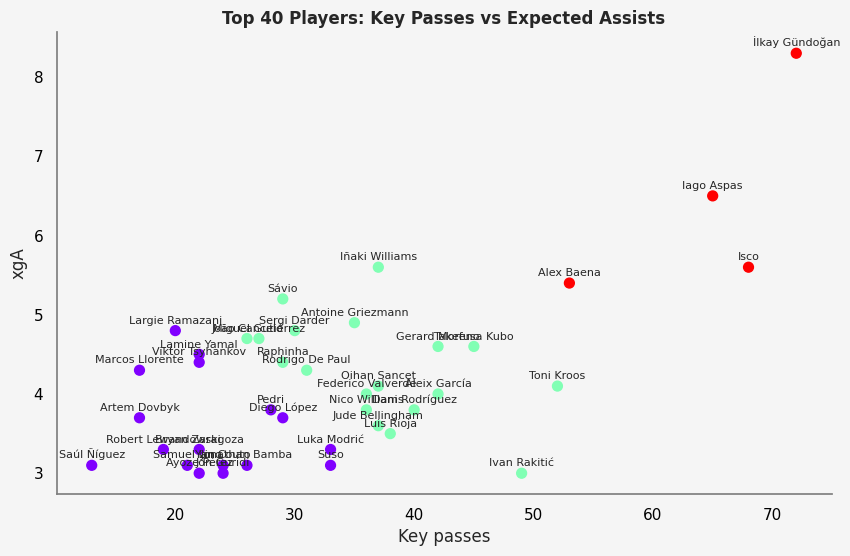

In [41]:
#mod_df = mod_df[mod_df['position_x'].str.contains('MF',case=False, na=False)].reset_index(drop=True)
#mod_df = mod_df[mod_df['position_x']=='MF']

sorted_df = mod_df.sort_values(by=['xg_assist'], ascending=False)

top_20 = sorted_df.head(40)
cluster_columns = ['assisted_shots', 'xg_assist']
cluster_data = top_20[cluster_columns]

scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
top_20['cluster'] = kmeans.fit_predict(cluster_data_scaled)

pca = PCA(n_components=2)
cluster_centers = pca.fit_transform(kmeans.cluster_centers_)
cluster_points = pca.transform(cluster_data_scaled)

fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(top_20['assisted_shots'], top_20['xg_assist'], c=top_20['cluster'],cmap='rainbow',s=50)

plt.title('Top 40 Players: Key Passes vs Expected Assists',fontweight='bold')
plt.xlabel('Key passes',fontsize=12)
plt.ylabel('xgA',fontsize=12)

for i, row in top_20.iterrows():
    plt.annotate(row['player'], (row['assisted_shots'], row['xg_assist']),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

#max_actions_row = top_20.iloc[0]
#plt.scatter(max_actions_row['progressive_carries'], max_actions_row['progressive_passes'], marker='*', color='blue', s=260, label='Max Actions')

sns.set_style("whitegrid")
sns.set_theme(style="white", rc={"axes.edgecolor": "grey", "xtick.color": "black", "ytick.color": "black"})

sns.despine()
fig.patch.set_facecolor('#F5F5F5')  # This sets the color inside the axes
ax.set_facecolor('#F5F5F5')
plt.grid(False)

In [42]:
top_20.reset_index()

,index,player,position,minutes_90s,assisted_shots,pass_xa,assists,assisted_shots_per90,pass_xa_per90,xg_assist,xg_assist_per90,cluster
0,202,İlkay Gündoğan,MF,23.3,72,7.9,6,3.090129,0.339056,8.3,0.356223,2
1,37,Iago Aspas,FW,19.9,65,6.2,5,3.266332,0.311558,6.5,0.326633,2
2,223,Isco,MF,20.5,68,5.4,3,3.317073,0.263415,5.6,0.273171,2
3,520,Iñaki Williams,FW,21.8,37,4.6,3,1.697248,0.211009,5.6,0.256881,1
4,44,Alex Baena,"MF,FW",19.3,53,6.0,8,2.746114,0.310881,5.4,0.279793,2
5,451,Sávio,"MF,FW",23.2,29,7.2,7,1.250000,0.310345,5.2,0.224138,1
6,191,Antoine Griezmann,"FW,MF",21.6,35,4.7,6,1.620370,0.217593,4.9,0.226852,1
7,115,Sergi Darder,"MF,FW",17.1,30,3.5,3,1.754386,0.204678,4.8,0.280702,1
8,404,Largie Ramazani,"FW,MF",14.4,20,2.0,4,1.388889,0.138889,4.8,0.333333,0
9,205,Miguel Gutiérrez,"DF,MF",24.7,27,4.4,4,1.093117,0.178138,4.7,0.190283,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-43-8d339f3f7825>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['cluster'] = kmeans.fit_predict(cluster_data_scaled)


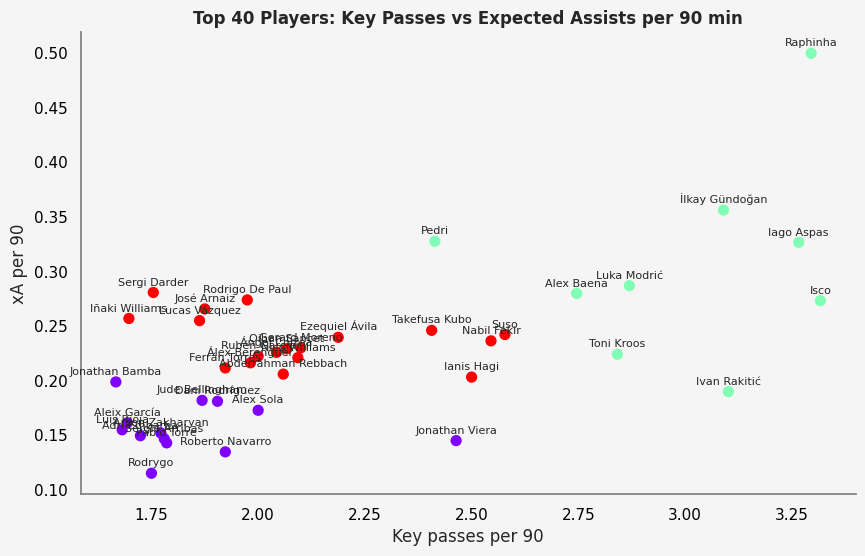

In [43]:
sorted_df = mod_df.sort_values(by=['assisted_shots_per90','xg_assist_per90'], ascending=False)

top_20 = sorted_df.head(40)
cluster_columns = ['assisted_shots_per90', 'xg_assist_per90']
cluster_data = top_20[cluster_columns]

scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
top_20['cluster'] = kmeans.fit_predict(cluster_data_scaled)

pca = PCA(n_components=2)
cluster_centers = pca.fit_transform(kmeans.cluster_centers_)
cluster_points = pca.transform(cluster_data_scaled)

fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(top_20['assisted_shots_per90'], top_20['xg_assist_per90'], c=top_20['cluster'],cmap='rainbow',s=50)

plt.title('Top 40 Players: Key Passes vs Expected Assists per 90 min',fontweight='bold')
plt.xlabel('Key passes per 90',fontsize=12)
plt.ylabel('xA per 90',fontsize=12)

for i, row in top_20.iterrows():
    plt.annotate(row['player'], (row['assisted_shots_per90'], row['xg_assist_per90']),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

#max_actions_row = top_20.iloc[0]
#plt.scatter(max_actions_row['progressive_carries'], max_actions_row['progressive_passes'], marker='*', color='blue', s=260, label='Max Actions')

sns.set_style("whitegrid")
sns.set_theme(style="white", rc={"axes.edgecolor": "grey", "xtick.color": "black", "ytick.color": "black"})

sns.despine()
fig.patch.set_facecolor('#F5F5F5')  # This sets the color inside the axes
ax.set_facecolor('#F5F5F5')
plt.grid(False)

## GCA vs SCA

In [44]:
goalshot_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_gca_Stats_Jornada{Jornada}.csv')
passing_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_passing_Stats_Jornada{Jornada}.csv')
passing_df =passing_df[["player","assisted_shots",'pass_xa']]
select_columns = ['player','position','minutes_90s','sca','sca_per90','gca','gca_per90']
mod_df = goalshot_df[select_columns]
mod_df = pd.merge(mod_df,passing_df, on='player')
mod_df

,player,position,minutes_90s,sca,sca_per90,gca,gca_per90,assisted_shots,pass_xa
0,Abner,DF,12.9,13,1.01,0,0.00,7,1.0
1,Abdel Abqar,DF,16.9,9,0.53,0,0.00,1,0.1
2,Marcos Acuña,DF,7.8,27,3.46,3,0.38,8,1.0
3,Lucien Agoume,MF,1.7,5,2.94,0,0.00,1,0.0
4,Joseph Aidoo,DF,4.5,6,1.33,1,0.22,1,0.0
...,...,...,...,...,...,...,...,...,...
550,Arsen Zakharyan,"MF,FW",7.9,31,3.91,2,0.25,14,1.6
551,Joseba Zaldúa,"DF,MF",3.6,2,0.55,0,0.00,0,0.1
552,Bryan Zaragoza,"MF,FW",18.2,69,3.79,5,0.27,22,4.2
553,Igor Zubeldia,DF,22.0,16,0.73,3,0.14,9,0.8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-45-7deac5670f48>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['cluster'] = kmeans.fit_predict(cluster_data_scaled)


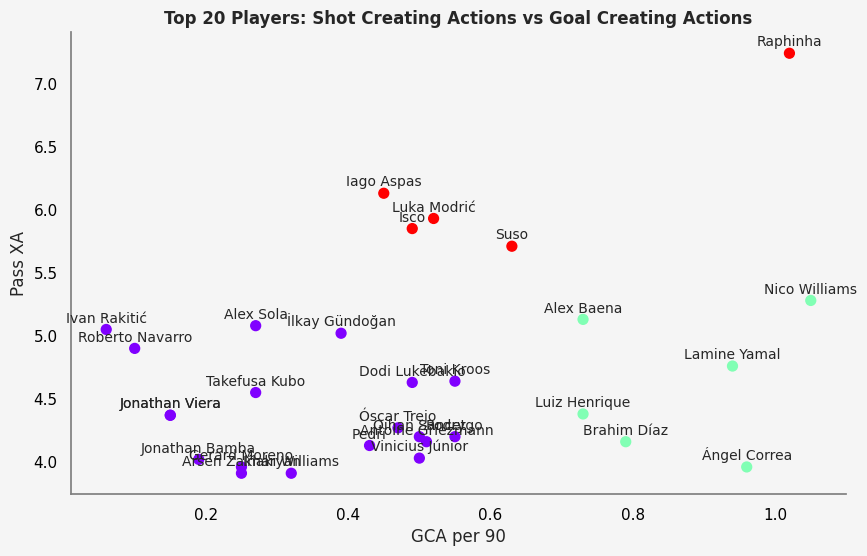

In [45]:
#mod_df = mod_df[mod_df['position_x'].str.contains('MF',case=False, na=False)].reset_index(drop=True)
#mod_df = mod_df[mod_df['position_x']=='MF']
mod_df = mod_df[mod_df['minutes_90s']>6.5]

sorted_df = mod_df.sort_values(by=['sca_per90'], ascending=False)

top_20 = sorted_df.head(30)
cluster_columns = ['gca_per90', 'sca_per90']
cluster_data = top_20[cluster_columns]

scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
top_20['cluster'] = kmeans.fit_predict(cluster_data_scaled)

pca = PCA(n_components=2)
cluster_centers = pca.fit_transform(kmeans.cluster_centers_)
cluster_points = pca.transform(cluster_data_scaled)

fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(top_20['gca_per90'], top_20['sca_per90'], c=top_20['cluster'],cmap='rainbow',s=50)

plt.title('Top 20 Players: Shot Creating Actions vs Goal Creating Actions',fontweight='bold')
plt.xlabel('GCA per 90',fontsize=12)
plt.ylabel('Pass XA',fontsize=12)

for i, row in top_20.iterrows():
    plt.annotate(row['player'], (row['gca_per90'], row['sca_per90']),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

#max_actions_row = top_20.iloc[0]
#plt.scatter(max_actions_row['progressive_carries'], max_actions_row['progressive_passes'], marker='*', color='blue', s=260, label='Max Actions')

sns.set_style("whitegrid")
sns.set_theme(style="white", rc={"axes.edgecolor": "grey", "xtick.color": "black", "ytick.color": "black"})

sns.despine()
fig.patch.set_facecolor('#F5F5F5')  # This sets the color inside the axes
ax.set_facecolor('#F5F5F5')
plt.grid(False)

In [46]:
top_20.reset_index()

,index,player,position,minutes_90s,sca,sca_per90,gca,gca_per90,assisted_shots,pass_xa,cluster
0,427,Raphinha,"FW,MF",8.8,64,7.24,9,1.02,29,4.1,2
1,37,Iago Aspas,FW,19.9,122,6.13,9,0.45,65,6.2,2
2,338,Luka Modrić,MF,11.5,68,5.93,6,0.52,33,2.5,2
3,233,Isco,MF,20.5,120,5.85,10,0.49,68,5.4,2
4,494,Suso,"MF,FW",12.8,73,5.71,8,0.63,33,4.0,2
5,544,Nico Williams,FW,17.2,91,5.28,18,1.05,36,5.0,1
6,46,Alex Baena,"MF,FW",19.3,99,5.13,14,0.73,53,6.0,1
7,480,Alex Sola,"FW,MF",11.0,56,5.08,3,0.27,22,1.8,0
8,421,Ivan Rakitić,MF,15.8,80,5.05,1,0.06,49,4.1,0
9,212,İlkay Gündoğan,MF,23.3,117,5.02,9,0.39,72,7.9,0


## Passes vs percentage

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-48-0f811e02f0fa>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['cluster'] = kmeans.fit_predict(cluster_data_scaled)


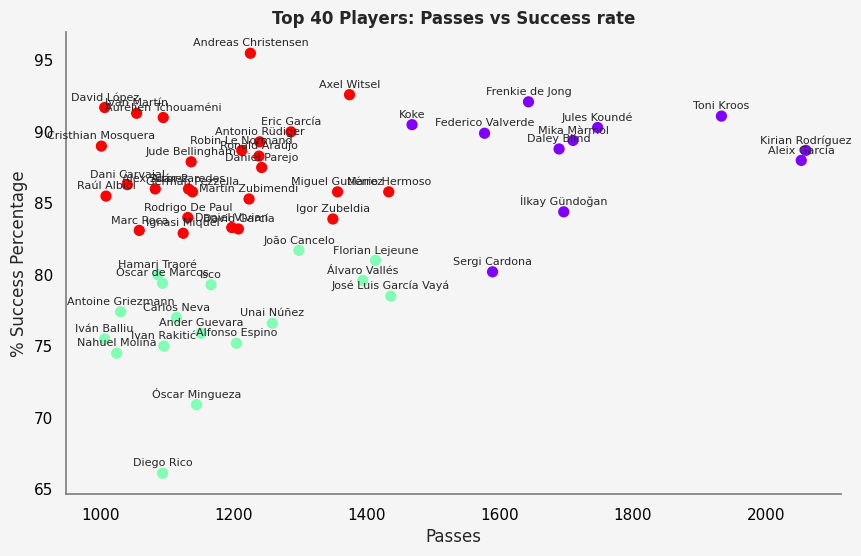

In [48]:
passing = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_passing_Stats_Jornada{Jornada}.csv')

sorted_df = passing.sort_values(by=['passes'], ascending=False)

top_20 = sorted_df[sorted_df['passes']>1000]
cluster_columns = ['passes', 'passes_pct']
cluster_data = top_20[cluster_columns]

scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
top_20['cluster'] = kmeans.fit_predict(cluster_data_scaled)

pca = PCA(n_components=2)
cluster_centers = pca.fit_transform(kmeans.cluster_centers_)
cluster_points = pca.transform(cluster_data_scaled)

fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(top_20['passes'], top_20['passes_pct'], c=top_20['cluster'],cmap='rainbow',s=50)

plt.title('Top 40 Players: Passes vs Success rate',fontweight='bold')
plt.xlabel('Passes',fontsize=12)
plt.ylabel('% Success Percentage',fontsize=12)

for i, row in top_20.iterrows():
    plt.annotate(row['player'], (row['passes'], row['passes_pct']),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

#max_actions_row = top_20.iloc[0]
#plt.scatter(max_actions_row['progressive_carries'], max_actions_row['progressive_passes'], marker='*', color='blue', s=260, label='Max Actions')

sns.set_style("whitegrid")
sns.set_theme(style="white", rc={"axes.edgecolor": "grey", "xtick.color": "black", "ytick.color": "black"})

sns.despine()
fig.patch.set_facecolor('#F5F5F5')  # This sets the color inside the axes
ax.set_facecolor('#F5F5F5')
plt.grid(False)

<ipython-input-62-e8ead801617a>:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(top_20['shots_on_target'], top_20['on_target%'], c="red",cmap='rainbow',s=50)


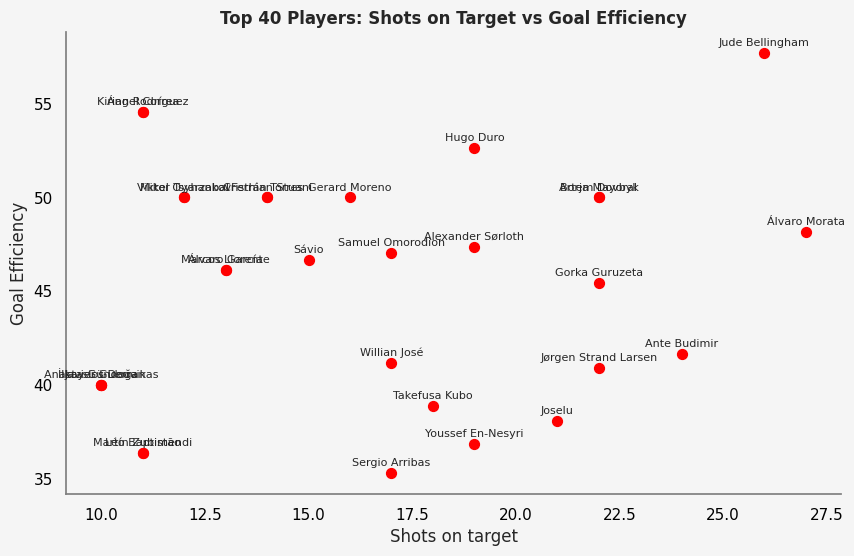

In [62]:
shooting = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_shooting_Stats_Jornada{Jornada}.csv')
shooting['on_target%'] = ((shooting['goals']-shooting['pens_made'])*100)/shooting['shots_on_target']

sorted_df = shooting[shooting['shots_on_target']>=10]
sorted_df = sorted_df.sort_values(by=['on_target%'], ascending=False)

top_20 = sorted_df.head(30)
#cluster_columns = ['passes', 'passes_pct']
#cluster_data = top_20[cluster_columns]

#scaler = StandardScaler()
#cluster_data_scaled = scaler.fit_transform(cluster_data)
#num_clusters = 3
#kmeans = KMeans(n_clusters=num_clusters, random_state=42)
#top_20['cluster'] = kmeans.fit_predict(cluster_data_scaled)

#pca = PCA(n_components=2)
#cluster_centers = pca.fit_transform(kmeans.cluster_centers_)
#cluster_points = pca.transform(cluster_data_scaled)

fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(top_20['shots_on_target'], top_20['on_target%'], c="red",cmap='rainbow',s=50)

plt.title('Top 40 Players: Shots on Target vs Goal Efficiency',fontweight='bold')
plt.xlabel('Shots on target',fontsize=12)
plt.ylabel('Goal Efficiency',fontsize=12)

for i, row in top_20.iterrows():
    plt.annotate(row['player'], (row['shots_on_target'], row['on_target%']),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

#max_actions_row = top_20.iloc[0]
#plt.scatter(max_actions_row['progressive_carries'], max_actions_row['progressive_passes'], marker='*', color='blue', s=260, label='Max Actions')

sns.set_style("whitegrid")
sns.set_theme(style="white", rc={"axes.edgecolor": "grey", "xtick.color": "black", "ytick.color": "black"})

sns.despine()
fig.patch.set_facecolor('#F5F5F5')  # This sets the color inside the axes
ax.set_facecolor('#F5F5F5')
plt.grid(False)

In [51]:
top_20[['player','position','minutes_90s','goals','shots_on_target','on_target%']].reset_index()

,index,player,position,minutes_90s,goals,shots_on_target,on_target%
0,42,Jude Bellingham,"MF,FW",19.8,16,26,57.692308
1,74,Ángel Correa,"FW,MF",9.3,7,11,54.545455
2,303,Kirian Rodríguez,MF,23.7,6,11,54.545455
3,90,Hugo Duro,FW,23.0,10,19,52.631579
4,88,Artem Dovbyk,FW,17.4,14,22,50.000000
5,349,Viktor Tsyhankov,"MF,FW",16.2,6,12,50.000000
6,343,Ferrán Torres,FW,10.4,7,14,50.000000
7,206,Borja Mayoral,FW,23.1,15,22,50.000000
8,252,Mikel Oyarzabal,"FW,MF",15.4,8,12,50.000000
9,230,Gerard Moreno,FW,20.0,10,16,50.000000


## Goalkeeping


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-52-963bd2848bb3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['cluster'] = kmeans.fit_predict(cluster_data_scaled)


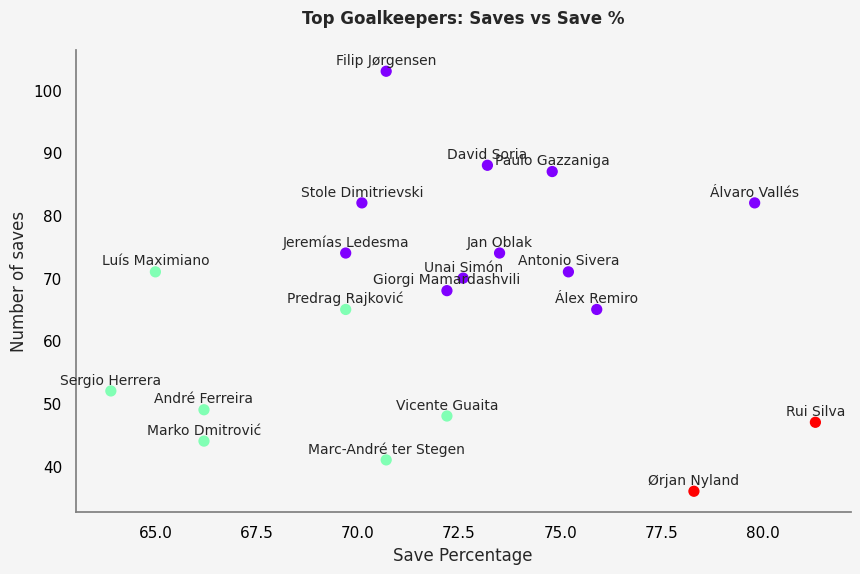

In [52]:
goalkeeping = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_keepers_Stats_Jornada{Jornada}.csv')


sorted_df = goalkeeping.sort_values(by=['gk_saves'], ascending=False)

top_20 = sorted_df.head(20)
cluster_columns = ['gk_save_pct', 'gk_saves']
cluster_data = top_20[cluster_columns]

scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
top_20['cluster'] = kmeans.fit_predict(cluster_data_scaled)

pca = PCA(n_components=2)
cluster_centers = pca.fit_transform(kmeans.cluster_centers_)
cluster_points = pca.transform(cluster_data_scaled)

fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(top_20['gk_save_pct'], top_20['gk_saves'], c=top_20['cluster'],cmap='rainbow',s=50)

plt.title('Top Goalkeepers: Saves vs Save %',fontweight='bold',y=1.04)
plt.xlabel('Save Percentage',fontsize=12)
plt.ylabel('Number of saves',fontsize=12)

for i, row in top_20.iterrows():
    plt.annotate(row['player'], (row['gk_save_pct'], row['gk_saves']),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

sns.set_style("whitegrid")
sns.set_theme(style="white", rc={"axes.edgecolor": "grey", "xtick.color": "black", "ytick.color": "black"})

sns.despine()
fig.patch.set_facecolor('#F5F5F5')  # This sets the color inside the axes
ax.set_facecolor('#F5F5F5')
plt.grid(False)

In [53]:
top_20[['player','gk_saves','gk_save_pct']]

,player,gk_saves,gk_save_pct
15,Filip Jørgensen,103,70.7
30,David Soria,88,73.2
11,Paulo Gazzaniga,87,74.8
32,Álvaro Vallés,82,79.8
5,Stole Dimitrievski,82,70.1
16,Jeremías Ledesma,74,69.7
23,Jan Oblak,74,73.5
29,Antonio Sivera,71,75.2
21,Luís Maximiano,71,65.0
28,Unai Simón,70,72.6


# **Team Playstyle analysis**
Here some statistics are analyzed in orther to get general insights about a team current performance or playstyle.
This features can be clustered in possession, attack and defending.
- **Possession**: possession percentage, long passes (>27,5 meters), medium passes (13'7 to 27,5 meters) and short passes (between 4,7 and 13,7 meters). Also succesful takeons and pass types such as throughballs, crosses and swtiches.
- **Attack**: In this field some statistics of teams per 90 minutes are gathered, for example goals, xg, assists, xA and total offsides.
- **Defending**: Here aerial duels and tackle percentage of each team are measured

In [54]:
!pip install soccerplots
from soccerplots.radar_chart import Radar
from soccerplots.utils import add_image

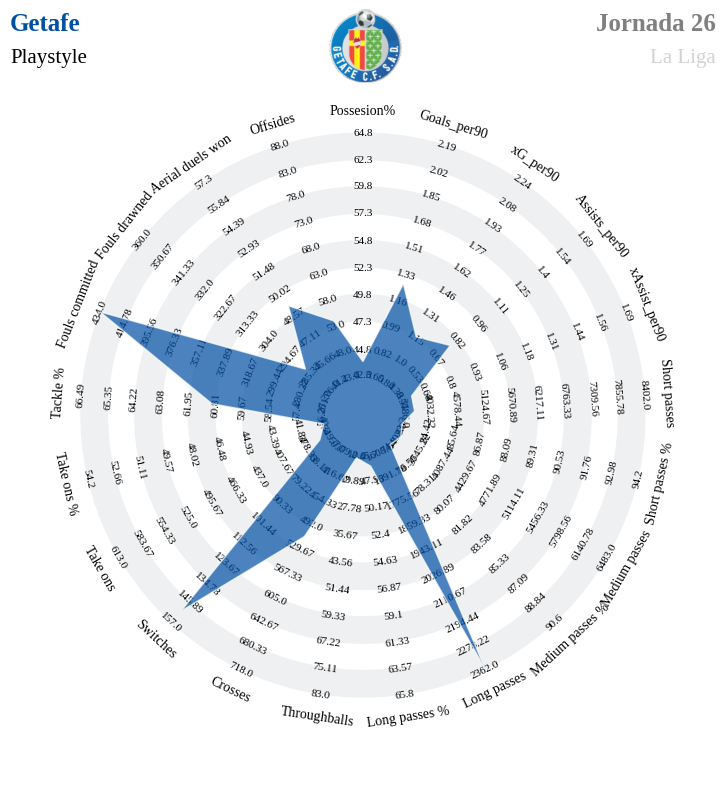

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from scipy import stats

# Load the datasets
std_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Standard_stats_Jornada{Jornada}.csv')
passing_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Passing_stats_Jornada{Jornada}.csv')
pass_types_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Passing_Types_stats_Jornada{Jornada}.csv')
possession_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Possession_stats_Jornada{Jornada}.csv')
defense_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Defense_stats_Jornada{Jornada}.csv')
miscellaneous_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Miscellaneous_stats_Jornada{Jornada}.csv')

# Create a tackles percentage variable
defense_df['tackles_pct']=(defense_df['tackles_won']/defense_df['tackles'])*100

# Filter data for a specific team ¡
team = 'Getafe'
color = next((item['Color'] for item in team_data if item['Team'] == team), None)
std_data = std_df[std_df['team'] == team]
pass_data = passing_df[passing_df['team'] == team]
pass_types_data = pass_types_df[pass_types_df['team'] == team]
possession_data = possession_df[possession_df['team'] == team]
defense_data = defense_df[defense_df['team'] == team]
miscellaneous_data = miscellaneous_df[miscellaneous_df['team'] == team]

# Define the radar pie chart categories and values
categories = ['Possesion%', 'Goals_per90','xG_per90', 'Assists_per90','xAssist_per90' ,'Short passes', 'Short passes %',
              'Medium passes', 'Medium passes %', 'Long passes', 'Long passes %', 'Throughballs', 'Crosses', 'Switches',
              'Take ons', 'Take ons %', 'Tackle %', 'Fouls committed', 'Fouls drawned', 'Aerial duels won', 'Offsides']


values = [
    std_data['possession'].mean(),
    std_data['goals_per90'].mean(),
    std_data['xg_per90'].mean(),
    std_data['assists_per90'].mean(),
    std_data['xg_assist_per90'].mean(),
    pass_data['passes_short'].mean(),
    pass_data['passes_pct_short'].mean(),
    pass_data['passes_medium'].mean(),
    pass_data['passes_pct_medium'].mean(),
    pass_data['passes_long'].mean(),
    pass_data['passes_pct_long'].mean(),
    pass_types_data['through_balls'].mean(),
    pass_types_data['crosses'].mean(),
    pass_types_data['passes_switches'].mean(),
    possession_data['take_ons'].mean(),
    possession_data['take_ons_won_pct'].mean(),
    defense_data['tackles_pct'].mean(),
    miscellaneous_data['fouls'].mean(),
    miscellaneous_data['fouled'].mean(),
    miscellaneous_data['aerials_won_pct'].mean(),
    miscellaneous_data['offsides'].mean(),
]

# Define ranges for scaling the values
value_ranges = [
    (std_df['possession'].min(), std_df['possession'].max()),  # Possession%
    (std_df['goals_per90'].min(), std_df['goals_per90'].max()),    # Goals per90
    (std_df['xg_per90'].min(), std_df['xg_per90'].max()),    # xG per90
    (std_df['assists_per90'].min(), std_df['assists_per90'].max()),    # Assists per90
    (std_df['xg_assist_per90'].min(),std_df['xg_assist_per90'].max()),    # xAssist per90
    (passing_df['passes_short'].min(), passing_df['passes_short'].max()),  # Short passes (you can adjust these ranges as needed)
    (passing_df['passes_pct_short'].min(), passing_df['passes_pct_short'].max()),  # Short pass percentage
    (passing_df['passes_medium'].min(), passing_df['passes_medium'].max()), # Medium passes
    (passing_df['passes_pct_medium'].min(), passing_df['passes_pct_medium'].max()), # Medium pass percentage
    (passing_df['passes_long'].min(), passing_df['passes_long'].max()), # Long passes
    (passing_df['passes_pct_long'].min(),passing_df['passes_pct_long'].max()), # Long Pass pecentage
    (pass_types_df['through_balls'].min(), pass_types_df['through_balls'].max()), # Through balls
    (pass_types_df['crosses'].min(), pass_types_df['crosses'].max()), # Crosses
    (pass_types_df['passes_switches'].min(), pass_types_df['passes_switches'].max()), # Switches
    (possession_df['take_ons'].min(), possession_df['take_ons'].max()), # Take ons
    (possession_df['take_ons_won_pct'].min(),  possession_df['take_ons_won_pct'].max()), # Take ons percentage
    (defense_df['tackles_pct'].min(), defense_df['tackles_pct'].max()), # Tackle percentage
    (miscellaneous_df['fouls'].min(), miscellaneous_df['fouls'].max()), # Fouls drawn
    (miscellaneous_df['fouled'].min(), miscellaneous_df['fouled'].max()), # Fouls commited
    (miscellaneous_df['aerials_won_pct'].min(), miscellaneous_df['aerials_won_pct'].max()), # Aerial percentage
    (miscellaneous_df['offsides'].min(), miscellaneous_df['offsides'].max()) # Offsides
]
values= [values]
radar = Radar(patch_color="#EEF0F2",label_fontsize=10,range_fontsize=8) # Initialize the object

title = dict(
    title_name=f'{team}',
    title_color = color,
    subtitle_name = 'Playstyle',
    subtitle_color = 'black',
    title_name_2=f'Jornada {Jornada}',
    title_color_2 = 'grey',
    subtitle_name_2 = 'La Liga',
    subtitle_color_2 = 'lightgrey',
    title_fontsize = 18,
    subtitle_fontsize=15
)

## add image
# Find the corresponding crest image file based on the 'team' variable
team_info = next((item for item in team_data if item['Team'] == team), None)
crest_filename = team_info['Crest']
path = os.path.join('/content/drive/MyDrive/FootballAnalytics/LaLiga/LaLiga_Crests_Background', crest_filename)

fig,ax = radar.plot_radar(ranges=value_ranges, params=categories,values=values,
                          radar_color = [color], alphas=[.7], image = path, image_coord=[0.464, 0.81, 0.1, 0.075],
                          title=title, endnote=None,end_color="white", dpi=600,filename="a",
                          compare=True)

# Calculate the percentiles for the entire dataset
values_all_teams = [std_df,std_df,std_df,
    std_df,
    std_df,
    passing_df,
    passing_df,
    passing_df,
    passing_df,
    passing_df,
    passing_df,
    pass_types_df,
    pass_types_df,
    pass_types_df,
    possession_df,
    possession_df,
    defense_df,
    miscellaneous_df,
    miscellaneous_df,
    miscellaneous_df,
    miscellaneous_df,
]

categories_p = ['possession','goals_per90','xg_per90', 'assists_per90','xg_assist_per90','passes_short','passes_pct_short',
    'passes_medium','passes_pct_medium', 'passes_long','passes_pct_long','through_balls','crosses','passes_switches','take_ons',
    'take_ons_won_pct','tackles_pct','fouls','fouled','aerials_won_pct','offsides']

data_to_concat = []
for df, category in zip(values_all_teams, categories_p):
  team_df=df[df['team']==team]
  team_value= team_df[category].values[0]
  percentile = stats.percentileofscore(df[category], team_value, kind='rank')
  # Append the results to the result_df
  data_to_concat.append(pd.DataFrame({'Category': [category],
                                            'Value': [team_value],
                                            'Percentile': [percentile]}))
result_df = pd.concat(data_to_concat, ignore_index=True)
result_df['Category'] = result_df['Category'].map(dict(zip(categories_p, categories)))

## **Two Teams Comparison**
Playstyle analysis of two different teams

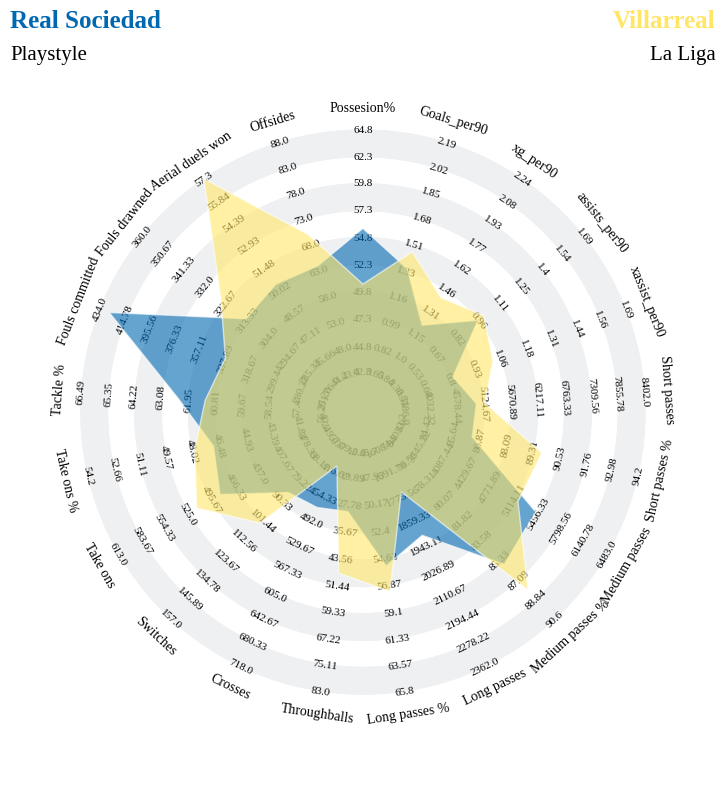

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

# Load the datasets
std_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Standard_stats_Jornada{Jornada}.csv')
passing_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Passing_stats_Jornada{Jornada}.csv')
pass_types_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Passing_Types_stats_Jornada{Jornada}.csv')
possession_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Possession_stats_Jornada{Jornada}.csv')
defense_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Defense_stats_Jornada{Jornada}.csv')
miscellaneous_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Miscellaneous_stats_Jornada{Jornada}.csv')

# Create a tackles_pct variable
defense_df['tackles_pct']=(defense_df['tackles_won']/defense_df['tackles'])*100

# Filter data for a specific team (replace 'your_team' with your desired team name)
team = 'Real Sociedad'
color0 = next((item['Color'] for item in team_data if item['Team'] == team), None)
std_data0 = std_df[std_df['team'] == team]
pass_data0 = passing_df[passing_df['team'] == team]
pass_types_data0 = pass_types_df[pass_types_df['team'] == team]
possession_data0 = possession_df[possession_df['team'] == team]
defense_data0 = defense_df[defense_df['team'] == team]
miscellaneous_data0 = miscellaneous_df[miscellaneous_df['team'] == team]

# Filter data for a specific team (replace 'your_team' with your desired team name)
team1 = 'Villarreal'
color1 = next((item['Color'] for item in team_data if item['Team'] == team1), None)
std_data1 = std_df[std_df['team'] == team1]
pass_data1 = passing_df[passing_df['team'] == team1]
pass_types_data1 = pass_types_df[pass_types_df['team'] == team1]
possession_data1 = possession_df[possession_df['team'] == team1]
defense_data1 = defense_df[defense_df['team'] == team1]
miscellaneous_data1 = miscellaneous_df[miscellaneous_df['team'] == team1]

# Define the radar pie chart categories and values
categories = ['Possesion%', 'Goals_per90','xg_per90', 'assists_per90','xassist_per90' ,'Short passes', 'Short passes %',
              'Medium passes', 'Medium passes %', 'Long passes', 'Long passes %', 'Throughballs', 'Crosses', 'Switches',
              'Take ons', 'Take ons %', 'Tackle %', 'Fouls committed', 'Fouls drawned', 'Aerial duels won', 'Offsides']

# Extract the values for the radar pie chart
tackles_pct0=(defense_data0['tackles_won']/defense_data0['tackles'])*100
tackles_pct1=(defense_data1['tackles_won']/defense_data1['tackles'])*100

values = [
    std_data0['possession'].mean(),
    std_data0['goals_per90'].mean(),
    std_data0['xg_per90'].mean(),
    std_data0['assists_per90'].mean(),
    std_data0['xg_assist_per90'].mean(),
    pass_data0['passes_short'].mean(),
    pass_data0['passes_pct_short'].mean(),
    pass_data0['passes_medium'].mean(),
    pass_data0['passes_pct_medium'].mean(),
    pass_data0['passes_long'].mean(),
    pass_data0['passes_pct_long'].mean(),
    pass_types_data0['through_balls'].mean(),
    pass_types_data0['crosses'].mean(),
    pass_types_data0['passes_switches'].mean(),
    possession_data0['take_ons'].mean(),
    possession_data0['take_ons_won_pct'].mean(),
    defense_data0['tackles_pct'].mean(),
    miscellaneous_data0['fouls'].mean(),
    miscellaneous_data0['fouled'].mean(),
    miscellaneous_data0['aerials_won_pct'].mean(),
    miscellaneous_data0['offsides'].mean(),
]
values1 = [
    std_data1['possession'].mean(),
    std_data1['goals_per90'].mean(),
    std_data1['xg_per90'].mean(),
    std_data1['assists_per90'].mean(),
    std_data1['xg_assist_per90'].mean(),
    pass_data1['passes_short'].mean(),
    pass_data1['passes_pct_short'].mean(),
    pass_data1['passes_medium'].mean(),
    pass_data1['passes_pct_medium'].mean(),
    pass_data1['passes_long'].mean(),
    pass_data1['passes_pct_long'].mean(),
    pass_types_data1['through_balls'].mean(),
    pass_types_data1['crosses'].mean(),
    pass_types_data1['passes_switches'].mean(),
    possession_data1['take_ons'].mean(),
    possession_data1['take_ons_won_pct'].mean(),
    defense_data1['tackles_pct'].mean(),
    miscellaneous_data1['fouls'].mean(),
    miscellaneous_data1['fouled'].mean(),
    miscellaneous_data1['aerials_won_pct'].mean(),
    miscellaneous_data1['offsides'].mean(),
]
# Define ranges for scaling the values
value_ranges = [
    (std_df['possession'].min(), std_df['possession'].max()),  # Possession%
    (std_df['goals_per90'].min(), std_df['goals_per90'].max()),    # Goals per90
    (std_df['xg_per90'].min(), std_df['xg_per90'].max()),    # xG per90
    (std_df['assists_per90'].min(), std_df['assists_per90'].max()),    # Assists per90
    (std_df['xg_assist_per90'].min(),std_df['xg_assist_per90'].max()),    # xAssist per90
    (passing_df['passes_short'].min(), passing_df['passes_short'].max()),  # Short passes (you can adjust these ranges as needed)
    (passing_df['passes_pct_short'].min(), passing_df['passes_pct_short'].max()),  # Short pass percentage
    (passing_df['passes_medium'].min(), passing_df['passes_medium'].max()), # Medium passes
    (passing_df['passes_pct_medium'].min(), passing_df['passes_pct_medium'].max()), # Medium pass percentage
    (passing_df['passes_long'].min(), passing_df['passes_long'].max()), # Long passes
    (passing_df['passes_pct_long'].min(),passing_df['passes_pct_long'].max()), # Long Pass pecentage
    (pass_types_df['through_balls'].min(), pass_types_df['through_balls'].max()), # Through balls
    (pass_types_df['crosses'].min(), pass_types_df['crosses'].max()), # Crosses
    (pass_types_df['passes_switches'].min(), pass_types_df['passes_switches'].max()), # Switches
    (possession_df['take_ons'].min(), possession_df['take_ons'].max()), # Take ons
    (possession_df['take_ons_won_pct'].min(),  possession_df['take_ons_won_pct'].max()), # Take ons percentage
    (defense_df['tackles_pct'].min(), defense_df['tackles_pct'].max()), # Tackle percentage
    (miscellaneous_df['fouls'].min(), miscellaneous_df['fouls'].max()), # Fouls drawn
    (miscellaneous_df['fouled'].min(), miscellaneous_df['fouled'].max()), # Fouls commited
    (miscellaneous_df['aerials_won_pct'].min(), miscellaneous_df['aerials_won_pct'].max()), # Aerial percentage
    (miscellaneous_df['offsides'].min(), miscellaneous_df['offsides'].max()) # Offsides
]

values= [values,values1]
radar = Radar(patch_color="#EEF0F2",label_fontsize=10,range_fontsize=8) # Initialize the object

title = dict(
    title_name=f'{team}',
    title_color = color0,
    subtitle_name = 'Playstyle',
    subtitle_color = 'black',
    title_name_2=f'{team1}',
    title_color_2 = color1,
    subtitle_name_2 = 'La Liga',
    subtitle_color_2 = 'black',
    title_fontsize = 18,
    subtitle_fontsize=15
)


fig,ax = radar.plot_radar(ranges=value_ranges, params=categories,values=values,
                          radar_color = [color0, color1], alphas=[.6,.6],
                          title=title, endnote=None,end_color="white", dpi=600,filename="a",
                          compare=True)



In [58]:
# Rankings entre dos equipos para comparar
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from scipy import stats

# Load the datasets
std_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Standard_stats_Jornada{Jornada}.csv')
goalkeeping_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Goalkeeping_stats_Jornada{Jornada}.csv')
passing_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Passing_stats_Jornada{Jornada}.csv')
possession_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Possession_stats_Jornada{Jornada}.csv')
sc_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_ShotCreation_stats_Jornada{Jornada}.csv')

# Modify possession dataframe to add a column named takons per game (equal to take_ons_won/matches)
possession_df = possession_df.merge(std_df[['team', 'games']], on='team', how='left')
possession_df['take_ons_won_per90'] = possession_df['take_ons_won'] / possession_df['games']

# Filter data for a specific team (replace 'your_team' with your desired team name)
#team = 'Atlético Madrid'
#color0 = '#CB3524'

#team1 = 'Celta Vigo'
#color1 = '#8AC3EE'

std_cat = ["games","goals","goals_against","points","cards_yellow","cards_red"]
goal_cat = ["gk_save_pct","gk_clean_sheets"]
pass_cat = ["passes_pct"]
possession_cat = ["possession","take_ons_won_per90",]
sc_cat = ["sca_per90","gca_per90"]

matches_played = 0
data_to_concat = []
# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Team','Category', 'Value', 'Percentile'])

# Loop through each category and its corresponding dataset
for category_name, category_values in zip(['Standard', 'Goalkeeping', 'Passing', 'Possession', 'ShotCreation'],
                                           [std_cat, goal_cat, pass_cat, possession_cat, sc_cat]):
  # Determine the corresponding DataFrame
    if category_name == 'Standard':
        dataset = std_df
    elif category_name == 'Goalkeeping':
        dataset = goalkeeping_df
    elif category_name == 'Passing':
        dataset = passing_df
    elif category_name == 'Possession':
        dataset = possession_df
    elif category_name == 'ShotCreation':
        dataset = sc_df


 # Loop through the selected category features
    for feature in category_values:
        # Get the category value for the team
        team0_data = dataset.loc[dataset['team'] == team]
        team1_data = dataset.loc[dataset['team'] == team1]

        team0_value = team0_data[feature].values[0]
        team1_value = team1_data[feature].values[0]

        # Calculate the percentile for the selected feature across all teams in the dataset
        percentile0 = stats.percentileofscore(dataset[feature], team0_value, kind='rank')
        percentile1 = stats.percentileofscore(dataset[feature], team1_value, kind='rank')

        # Append the results to the result_df
        data_to_concat.append(pd.DataFrame({'Team': [team, team1],
                                            'Category': [feature, feature],
                                            'Value': [team0_value, team1_value],
                                            'Percentile': [percentile0, percentile1]}))
    result_df = pd.concat(data_to_concat, ignore_index=True)

#print(result_df)

# Rename the categories for a smoother visualization
category_mapping = {
    'games': 'Matches Played',
    'goals': 'Goals Scored',
    'goals_against': 'Goals Conceded',
    'points': 'Total Points',
    'cards_yellow': 'Yellow Cards',
    'cards_red': 'Red Cards',
    'gk_save_pct': 'Shots on Goal Save %',
    'gk_clean_sheets': 'Clean Sheets',
    'passes_pct': 'Pass Completion %',
    'possession': 'Possession %',
    'take_ons_won_per90': 'Take-Ons Won Per 90',
    'sca_per90': 'Shot-Creating Actions Per 90',
    'gca_per90': 'Goal-Creating Actions Per 90'
}
# Replace the categories' names
result_df['Category'] = result_df['Category'].replace(category_mapping)
result_df

,Team,Category,Value,Percentile
0,Real Sociedad,Matches Played,26.000000,57.5
1,Villarreal,Matches Played,26.000000,57.5
2,Real Sociedad,Goals Scored,35.000000,70.0
3,Villarreal,Goals Scored,38.000000,75.0
4,Real Sociedad,Goals Conceded,26.000000,17.5
5,Villarreal,Goals Conceded,48.000000,90.0
6,Real Sociedad,Total Points,40.000000,70.0
7,Villarreal,Total Points,29.000000,42.5
8,Real Sociedad,Yellow Cards,70.000000,70.0
9,Villarreal,Yellow Cards,75.000000,80.0


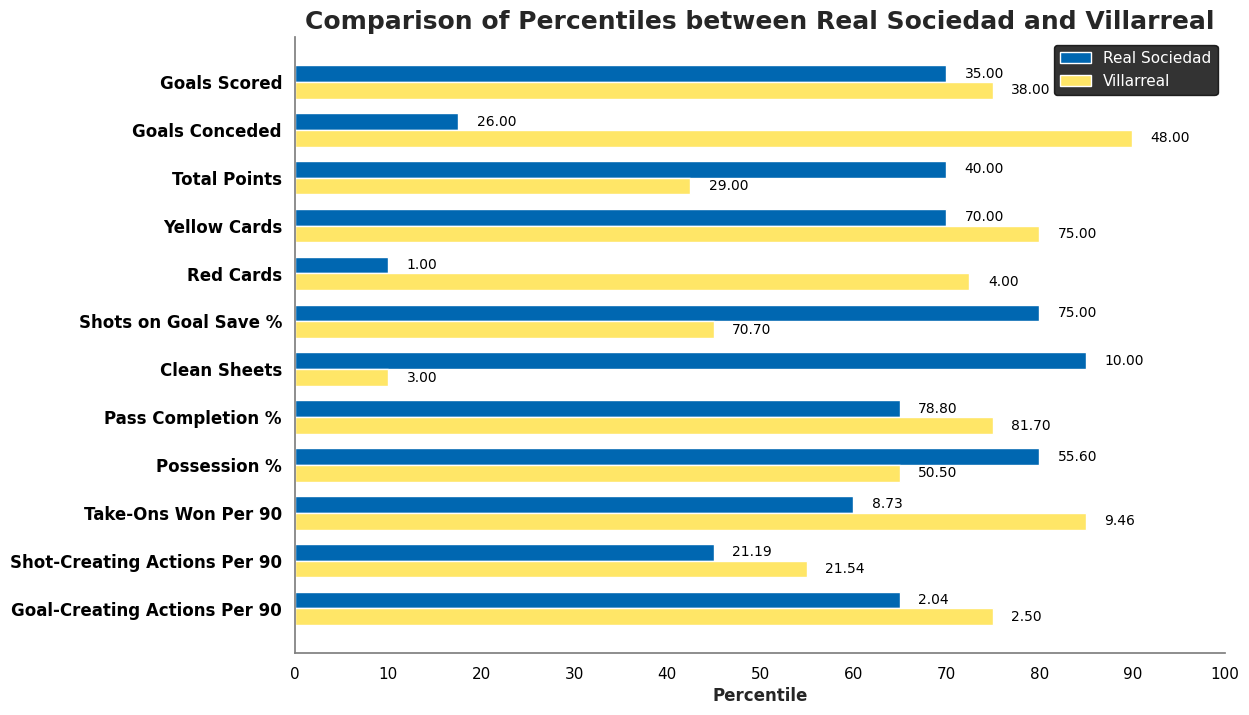

In [59]:
result_df = result_df[result_df['Category'] != 'Matches Played']

# Crear una lista de categorías únicas
categories = result_df['Category'].unique()
num_categories = len(categories)

# Crear un rango para la posición de las barras
bar_positions = np.arange(num_categories)

# Crear un ancho para las barras
bar_width = 0.35

# Crear un gráfico de barras agrupadasÇ
fig, ax = plt.subplots(figsize=(12, 8))

# Dibujar barras para Equipo 1
team1_bars = ax.barh(bar_positions - bar_width/2, result_df[result_df['Team'] == team]['Percentile'], bar_width, label= team, color=color0)

# Dibujar barras para Equipo 2
team2_bars = ax.barh(bar_positions + bar_width/2, result_df[result_df['Team'] == team1]['Percentile'], bar_width, label= team1, color= color1)

# Configurar el eje y
ax.set_xticks(range(0, 101, 10))
ax.set_xlim(0, 100)
ax.set_xlabel('Percentile', fontsize = 12,fontweight='bold')
ax.set_title(f'Comparison of Percentiles between {team} and {team1}', fontweight = 'bold',fontsize=18)
ax.set_yticks(bar_positions)
ax.set_yticklabels(categories, rotation=0, fontsize = 12,fontweight='bold')
ax.invert_yaxis()  # Invertir el eje y

# Anotar los valores al lado de las barras
for i, category in enumerate(categories):
    value_team = result_df[(result_df['Team'] == team) & (result_df['Category'] == category)]['Value'].values[0]
    value_team1 = result_df[(result_df['Team'] == team1) & (result_df['Category'] == category)]['Value'].values[0]
    ax.text(result_df[(result_df['Team'] == team) & (result_df['Category'] == category)]['Percentile'].values[0]+2, i - bar_width/2, f'{value_team:.2f}', va='center', fontsize=10, color="black")
    ax.text(result_df[(result_df['Team'] == team1) & (result_df['Category'] == category)]['Percentile'].values[0]+2, i + bar_width/2, f'{value_team1:.2f}', va='center',fontsize=10, color="black")

ax.legend(loc = 'upper right',facecolor='black', edgecolor = "black",labelcolor = "white")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)

plt.savefig('Percentile_2_teams_comparison.png', bbox_inches='tight')
plt.show()

# **Stat Ranking per Player**

In [60]:
player_name = "Iñigo Ruiz de Galarreta"

std_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_Standard_Stats_Jornada{Jornada}.csv')
gca_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_gca_Stats_Jornada{Jornada}.csv')
passing_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_passing_Stats_Jornada{Jornada}.csv')
defense_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_defense_Stats_Jornada{Jornada}.csv')
possession_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_possession_Stats_Jornada{Jornada}.csv')
miscellaneous_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_misc_Stats_Jornada{Jornada}.csv')

player_df = pd.DataFrame(columns=['Category','Value','Rank'])

std_c=["goals","xg","minutes","assists","xg_assist","pens_made"]
pass_c=["passes_completed","assisted_shots","passes_into_final_third","passes_into_penalty_area","progressive_passes"]
gca_c=["sca","gca","gca_per90"]
misc_c=["cards_yellow","cards_red","fouls","fouled","offsides","ball_recoveries","aerials_won"]
possession_c=["touches_att_pen_area","take_ons_won","progressive_carries"]
defense_c=["tackles_won","blocks","interceptions"]


data_to_concat2 = []
# Loop through each category and its corresponding dataset
for category_name, category_values in zip(['Standard','Passing','GCA','Miscellaneous','Possession','Defense'],
                      [std_c,pass_c,gca_c,misc_c,possession_c,defense_c]):
      if category_name == 'Standard':
          dataset = std_df
      elif category_name == 'GCA':
          dataset = gca_df
      elif category_name == 'Passing':
          dataset = passing_df
      elif category_name == 'Possession':
          dataset = possession_df
      elif category_name == 'Defense':
          dataset = defense_df
      elif category_name == 'Miscellaneous':
          dataset = miscellaneous_df

      for feature in category_values:
            sorted_df = dataset.sort_values(by=feature, ascending=False)
            player_rank = sorted_df.reset_index().index[sorted_df['player'] == player_name].tolist()[0] + 1
            feature_value = sorted_df.loc[sorted_df['player'] == player_name, feature].iloc[0]
            data_to_concat2.append(pd.DataFrame({'Category': [feature],
                                    'Value': [feature_value],
                                    'Rank': [player_rank]
                                    }))

team_df = pd.concat(data_to_concat2, ignore_index=True)



defense_c=["tackles_won","blocks","interceptions"]
category_mapping = {
'goals': 'Goals',
'xg': 'Expected Goals',
'minutes': 'Minutes',
'assists': 'Assists',
'xg_assist': 'Expected Assists',
'pens_made': 'Penalties made',
'passes_completed': 'Passes',
'assisted_shots': 'Key Passes',
'passes_into_final_third': 'Passes into final third',
'passes_into_penalty_area': 'Passes into penalty area',
'progressive_passes': 'Progressive Passes',
'sca': 'Shot Creating Actions',
'gca': 'Goal Creating Actions',
'cards_yellow': 'Yellow Cards',
'cards_red': 'Red Cards',
'fouls': 'Fouls made',
'fouled': 'Fouls suffered',
'offsides': 'Offsides',
'ball_recoveries': 'Ball Recoveries',
'aerials_won': 'Aerials won',
'touches_att_pen_area': 'Touches pen area',
'take_ons_won': 'Takeons won',
'progressive_carries': 'Progressive carries',
'tackles_won': 'Tackles won',
'blocks': 'Blocks',
'interceptions': 'Interceptions',
}
# Replace the categories' names
team_df['Category'] = team_df['Category'].replace(category_mapping)
team_df



,Category,Value,Rank
0,Goals,1.00,228
1,Expected Goals,0.30,341
2,Minutes,1521.00,131
3,Assists,1.00,188
4,Expected Assists,1.20,135
5,Penalties made,0.00,506
6,Passes,682.00,89
7,Key Passes,16.00,102
8,Passes into final third,81.00,36
9,Passes into penalty area,16.00,84


## **Stat Ranking per Team**

In [61]:
for index, team in enumerate(team_data):
    print(f"{index + 1}. {team['Team']}")


choice = input("Enter the number of the team you want to select: ")
selected_team = team_data[int(choice) - 1]
selected_team = selected_team['Team']
print(selected_team)

std_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Standard_stats_Jornada{Jornada}.csv')
gca_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_ShotCreation_stats_Jornada{Jornada}.csv')
passing_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Passing_stats_Jornada{Jornada}.csv')
defense_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Defense_stats_Jornada{Jornada}.csv')
possession_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Possession_stats_Jornada{Jornada}.csv')
miscellaneous_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/LaLiga_Miscellaneous_stats_Jornada{Jornada}.csv')

team_df = pd.DataFrame(columns=['Category','Value','Rank'])

std_c=["goals","xg","minutes","assists","xg_assist","pens_made"]
pass_c=["passes_completed","assisted_shots","passes_into_final_third","passes_into_penalty_area","progressive_passes"]
gca_c=["sca","gca"]
misc_c=["cards_yellow","cards_red","fouls","fouled","offsides","ball_recoveries","aerials_won"]
possession_c=["touches_att_pen_area","take_ons_won","progressive_carries"]
defense_c=["tackles_won","blocks","interceptions"]

std_df['minutes'] = std_df['minutes'].str.replace(",","")
std_df['minutes'] = pd.to_numeric(std_df['minutes'], errors='coerce')

data_to_concat2 = []
# Loop through each category and its corresponding dataset
for category_name, category_values in zip(['Standard','Passing','GCA','Miscellaneous','Possession','Defense'],
                      [std_c,pass_c,gca_c,misc_c,possession_c,defense_c]):
      if category_name == 'Standard':
          dataset = std_df
      elif category_name == 'GCA':
          dataset = gca_df
      elif category_name == 'Passing':
          dataset = passing_df
      elif category_name == 'Possession':
          dataset = possession_df
      elif category_name == 'Defense':
          dataset = defense_df
      elif category_name == 'Miscellaneous':
          dataset = miscellaneous_df

      for feature in category_values:
            sorted_df = dataset.sort_values(by=feature, ascending=False)
            team_rank = sorted_df.reset_index().index[sorted_df['team'] == selected_team].tolist()[0] + 1
            feature_value = sorted_df.loc[sorted_df['team'] == selected_team, feature].iloc[0]
            data_to_concat2.append(pd.DataFrame({'Category': [feature],
                                    'Value': [feature_value],
                                    'Rank': [team_rank]
                                    }))

team_df = pd.concat(data_to_concat2, ignore_index=True)



defense_c=["tackles_won","blocks","interceptions"]
category_mapping = {
'goals': 'Goals',
'xg': 'Expected Goals',
'minutes': 'Minutes',
'assists': 'Assists',
'xg_assist': 'Expected Assists',
'pens_made': 'Penalties made',
'passes_completed': 'Passes',
'assisted_shots': 'Key Passes',
'passes_into_final_third': 'Passes into final third',
'passes_into_penalty_area': 'Passes into penalty area',
'progressive_passes': 'Progressive Passes',
'sca': 'Shot Creating Actions',
'gca': 'Goal Creating Actions',
'cards_yellow': 'Yellow Cards',
'cards_red': 'Red Cards',
'fouls': 'Fouls made',
'fouled': 'Fouls suffered',
'offsides': 'Offsides',
'ball_recoveries': 'Ball Recoveries',
'aerials_won': 'Aerials won',
'touches_att_pen_area': 'Touches pen area',
'take_ons_won': 'Takeons won',
'progressive_carries': 'Progressive carries',
'tackles_won': 'Tackles won',
'blocks': 'Blocks',
'interceptions': 'Interceptions',
}
# Replace the categories' names
team_df['Category'] = team_df['Category'].replace(category_mapping)
team_df


1. Alavés
2. Almería
3. Athletic Club
4. Atlético Madrid
5. Barcelona
6. Betis
7. Cádiz
8. Celta Vigo
9. Getafe
10. Girona
11. Granada
12. Las Palmas
13. Mallorca
14. Osasuna
15. Rayo Vallecano
16. Real Madrid
17. Real Sociedad
18. Sevilla
19. Valencia
20. Villarreal
Enter the number of the team you want to select: 4
Atlético Madrid


,Category,Value,Rank
0,Goals,52.0,4
1,Expected Goals,45.3,3
2,Minutes,2340.0,17
3,Assists,38.0,3
4,Expected Assists,35.6,2
5,Penalties made,4.0,5
6,Passes,12059.0,5
7,Key Passes,244.0,7
8,Passes into final third,870.0,5
9,Passes into penalty area,272.0,3
